In [5]:
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [7]:
config_id = 6

model_results = pd.read_excel(f'best_models_results/best_models_results_{config_id}.xlsx')
model_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   T                180 non-null    int64  
 1   window_size      180 non-null    int64  
 2   hidden_dim       180 non-null    int64  
 3   num_layers       180 non-null    int64  
 4   best_val_loss    180 non-null    float64
 5   best_model_path  180 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.6+ KB


In [8]:
# 按照 best_val_loss 进行排序
model_results.sort_values(by='best_val_loss', inplace=True)
model_results.reset_index(drop=True, inplace=True)
model_results.head(10)

,T,window_size,hidden_dim,num_layers,best_val_loss,best_model_path
0,30,40,50,3,0.00000166,lstm_models_6\best_lstm_model_T30_window40_hid...
1,30,120,70,3,0.00000176,lstm_models_6\best_lstm_model_T30_window120_hi...
2,30,60,30,3,0.00000177,lstm_models_6\best_lstm_model_T30_window60_hid...
3,30,60,70,5,0.00000180,lstm_models_6\best_lstm_model_T30_window60_hid...
4,30,120,50,5,0.00000190,lstm_models_6\best_lstm_model_T30_window120_hi...
5,30,60,50,5,0.00000196,lstm_models_6\best_lstm_model_T30_window60_hid...
6,30,40,50,5,0.00000197,lstm_models_6\best_lstm_model_T30_window40_hid...
7,30,60,70,3,0.00000197,lstm_models_6\best_lstm_model_T30_window60_hid...
8,15,120,70,3,0.00000206,lstm_models_6\best_lstm_model_T15_window120_hi...
9,30,120,30,5,0.00000207,lstm_models_6\best_lstm_model_T30_window120_hi...


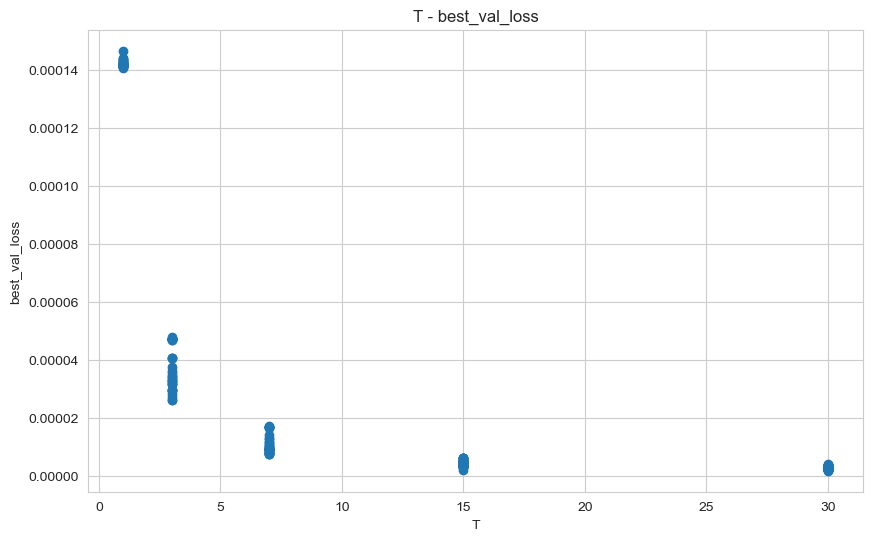

In [9]:
# 可视化分析T与best_val_loss的关系
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model_results['T'], model_results['best_val_loss'], 'o')
plt.xlabel('T')
plt.ylabel('best_val_loss')
plt.title('T - best_val_loss')
plt.show()

In [33]:
import os
import plotly.express as px

# 数据准备
config_id = 6  # 根据实际情况调整ID
file_path = f'best_models_results_{config_id}.xlsx'
data = pd.read_excel(file_path)

In [34]:

directory = f'3d_scatter_plots_{config_id}'

print(f"Creating directory: {directory}")
print(f"Current working directory: {os.getcwd()}")

if not os.path.exists(directory):
    try:
        os.makedirs(directory)
        print(f"Directory '{directory}' created.")
    except Exception as e:
        print(f"Failed to create directory '{directory}'. Error: {e}")
else:
    print(f"Directory '{directory}' already exists.")

Creating directory: 3d_scatter_plots_6
Current working directory: C:\Users\Administrator\.goldminer3\projects\results
Directory '3d_scatter_plots_6' already exists.


In [37]:

# 为每个T值绘制三维散点图
for t in data['T'].unique():
    fig = px.scatter_3d(data[data['T'] == t],
                        x='window_size',
                        y='hidden_dim',
                        z='num_layers',
                        color='best_val_loss',
                        color_continuous_scale='Viridis',
                        title=f'三维散点图 for T={t}',
                        labels={'window_size': '窗口大小', 'hidden_dim': '隐藏层维度', 'num_layers': '层数', 'best_val_loss': '最佳验证集损失'})
    # 将best_val_loss最小的三个的参数标注在图中，就像把鼠标放到点上显示的信息
    fig.update_traces(textposition='top center', textfont_size=8, selector=dict(mode='markers'))
    
 
    fig.show()

    # 保存图表
    fig.write_html(f'3d_scatter_plots_{config_id}/3d_scatter_plot_T_{t}.html')


In [41]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 数据准备
config_id = 6  # 根据实际情况调整ID
file_path = f'best_models_results_{config_id}.xlsx'
data = pd.read_excel(file_path)

# 创建子图布局，每个T值一个子图
fig = make_subplots(
    rows=3, cols=2,  # 根据T值的数量调整，这里假设有5个T值
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, {'type': 'scatter3d'}],
           [{'type': 'scatter3d'}, None]],  # 最后一个子图没有对应的T值
    subplot_titles=[f'T={t}' for t in sorted(data['T'].unique())]
)

# 添加每个子图的数据
for i, t in enumerate(sorted(data['T'].unique()), start=1):
    subset = data[data['T'] == t]
    row = (i - 1) // 2 + 1
    col = (i - 1) % 2 + 1
    fig.add_trace(
        go.Scatter3d(
            x=subset['window_size'],
            y=subset['hidden_dim'],
            z=subset['num_layers'],
            mode='markers',
            marker=dict(
                size=5,
                color=subset['best_val_loss'],  # 使用损失值作为颜色
                colorscale='Viridis',
                showscale=True if i == len(data['T'].unique()) else False  # 只在最后一个图显示颜色条
            ),
            name=f'T={t}'
        ),
        row=row, col=col
    )

# 更新布局
fig.update_layout(height=900, width=1200, title_text="各T值参数配置的三维散点图子图集合")

# 显示图形
fig.show()

#保存
fig.write_html(f'3d_scatter_plots_{config_id}/3d_scatter_plot_all_T.html')

In [10]:
from data.get_data import get_common_data
from model.LSTM_base_model import val_start_date,val_end_date

data = get_common_data('SHSE.510300', val_start_date, val_end_date, 1)

# 计算data最后一列的均值
data['avg_daily_return_1'].mean()

# 计算方差
data['avg_daily_return_1'].var()

0.00014168576630561216

## NMSE计算，可视化T - NMSE

In [46]:
model_results['best_valLoss%var'] = model_results['best_val_loss'] / data['avg_daily_return_1'].var()

In [74]:
from pyecharts.charts import Scatter
from pyecharts import options as opts
import numpy as np

T = model_results['T']
best_valLoss_var = model_results['best_valLoss%var']

scatter = (
    Scatter(init_opts=opts.InitOpts(width="800px", height="500px"))
    .add_xaxis(T.tolist())
    .add_yaxis(
        series_name="NMSE",
        y_axis=best_valLoss_var.tolist(),
        symbol_size=10,
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="T - NMSE"),
        xaxis_opts=opts.AxisOpts(type_="value", name="T"),
        yaxis_opts=opts.AxisOpts(type_="value", name="NMSE"),
        tooltip_opts=opts.TooltipOpts(is_show=True),
        visualmap_opts=opts.VisualMapOpts(
            type_="color", max_=1.5, min_=0, dimension=1,
            orient="vertical", is_calculable=True,
            pos_left="10", pos_top="middle"
        )
    )
)

# 渲染图表到 HTML 文件中，查看效果
scatter.render("scatter_plot.html")


'C:\\Users\\Administrator\\.goldminer3\\projects\\results\\scatter_plot.html'

In [77]:
# 查看不同T下的最佳模型
temp = model_results.groupby('T').first()

#删掉best_val_loss列,best_model_path列
temp.drop(['best_val_loss','best_model_path'],axis=1,inplace=True)
temp

,window_size,hidden_dim,num_layers,best_valLoss%var
T,,,,
1,20,50,5,0.99313808
3,120,50,5,0.18302805
7,120,30,5,0.05216523
15,120,70,3,0.01456006
30,40,50,3,0.01170220


In [66]:
data = model_results
# 遍历每个T值，为每个T值创建一个独立的图形
for t in data['T'].unique():
    fig = go.Figure()
    subset = data[data['T'] == t]

    # 添加三维散点图
    fig.add_trace(go.Scatter3d(
        x=subset['window_size'],
        y=subset['hidden_dim'],
        z=subset['num_layers'],
        mode='markers',
        marker=dict(
            size=5,
            color=subset['best_valLoss%var'],  # 使用损失值作为颜色
            colorscale='Viridis_r',  # 颜色反转
            colorbar=dict(title='NMSE')
        )
    ))

    # # 寻找具有最小损失值的前三个点并标注
    # top_points = subset.nsmallest(3, 'best_valLoss%var')
    # for _, point in top_points.iterrows():
    #     fig.add_trace(go.Scatter3d(
    #         x=[point['window_size']],
    #         y=[point['hidden_dim']],
    #         z=[point['num_layers']],
    #         text=[f"NMSE: {point['best_valLoss%var']:.2e}"],
    #         mode='text',
    #         textposition="middle center",
    #         showlegend=False,
    #         textfont=dict(
    #             color="black",
    #             size=10
    #         )
    #     ))

    # 更新布局
    fig.update_layout(
        title=f'三维散点图 for T={t}: 参数配置',
        scene=dict(
            xaxis_title='窗口大小',
            yaxis_title='隐藏层维度',
            zaxis_title='层数'
        )
    )

    # 显示图形
    fig.show()

    # 保存图表
    fig.write_html(f'3d_scatter_plots_{config_id}/3d_scatter_plot_T_{t}.html')
    
    # 保存图形为PNG图片
    image_path = f'3d_scatter_plots_{config_id}/3d_scatter_plot_T_{t}.png'
    fig.write_image(image_path)


ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
## 查看NMSE最小的模型们对应的超参数

In [30]:
# 按照best_valLoss%var进行排序
model_results.sort_values(by='best_valLoss%var', inplace=True)
model_results.reset_index(drop=True, inplace=True)
model_results

,T,window_size,hidden_dim,num_layers,best_val_loss,best_model_path,best_valLoss%var
0,1,20,30,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
1,1,40,30,9,0.00000000,lstm_models_1\best_lstm_model_T1_window40_hidd...,0.00000000
2,1,20,30,5,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
3,1,20,30,9,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
4,1,20,50,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
...,...,...,...,...,...,...,...
175,7,120,50,5,0.00000651,lstm_models_1\best_lstm_model_T7_window120_hid...,0.02629530
176,7,120,70,3,0.00000735,lstm_models_1\best_lstm_model_T7_window120_hid...,0.02971491
177,7,120,70,5,0.00000759,lstm_models_1\best_lstm_model_T7_window120_hid...,0.03067944
178,7,120,50,9,0.00001468,lstm_models_1\best_lstm_model_T7_window120_hid...,0.05932296


In [31]:
# 查看每个T对应的NMSE最小的模型
model_results.groupby('T').first()

,window_size,hidden_dim,num_layers,best_val_loss,best_model_path,best_valLoss%var
T,,,,,,
1,20,30,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
3,40,50,5,0.00000000,lstm_models_1\best_lstm_model_T3_window40_hidd...,0.00000000
7,40,70,9,0.00000000,lstm_models_1\best_lstm_model_T7_window40_hidd...,0.00000000
15,120,50,5,0.00000185,lstm_models_1\best_lstm_model_T15_window120_hi...,0.00748087
30,120,30,3,0.00000110,lstm_models_1\best_lstm_model_T30_window120_hi...,0.00445722


# T与threshold调参结果分析

In [16]:
config_id = 6
data = pd.read_excel(f'optimization_results_{config_id}.xlsx')
data

FileNotFoundError: [Errno 2] No such file or directory: 'optimization_results_6.xlsx'

In [35]:
import ast

# 将字符串转换为字典
dict_data = ast.literal_eval(data.iloc[0,0])

# 获取字典的所有键
keys = list(dict_data.keys())
df = pd.DataFrame(columns=keys)
for i in range(len(data)):
    # 将当前行的字符串转换为字典
    row_data = ast.literal_eval(data.iloc[i, 0])
    # 创建一个临时的DataFrame存储当前行的数据
    temp_df = pd.DataFrame([row_data])
    # 使用concat方法合并DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)
# df.to_excel('optimization_results.xlsx', index=False)
df

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual
0,"{'T': 1, 'threshold': 0.001}",0.00059924,0.00731819,0.06787240,0.00081918
1,"{'T': 3, 'threshold': 0.001}",-0.00659253,-0.08098832,0.06774807,-0.00901226
2,"{'T': 7, 'threshold': 0.001}",0.01654890,0.20628444,0.06732217,0.02262303
3,"{'T': 15, 'threshold': 0.001}",0.01047426,0.12790213,0.06281359,0.01431875
4,"{'T': 30, 'threshold': 0.001}",-0.00503190,-0.06212990,0.06525104,-0.00687882


# 日志数据提取


In [47]:
import pandas as pd
import re

def extract_data(data_str):
    # Define the regular expression to match the data
    pattern = r"{'params': {'target_T': (\d+), 'threshold': (0.\d+)}, 'pnl_ratio': ([-+]?[0-9]*\.?[0-9]+), 'sharp_ratio': ([-+]?[0-9]*\.?[0-9]+), 'max_drawdown': ([-+]?[0-9]*\.?[0-9]+), 'pnl_ratio_annual': ([-+]?[0-9]*\.?[0-9]+)}"

    # Use the regular expression to find all matches
    matches = re.findall(pattern, data_str)

    # Convert the data into a DataFrame
    df = pd.DataFrame(matches, columns=['target_T', 'threshold', 'pnl_ratio', 'sharp_ratio', 'max_drawdown', 'pnl_ratio_annual'])

    # Convert the data types to the appropriate types
    df = df.astype({'target_T': int, 'threshold': float, 'pnl_ratio': float, 'sharp_ratio': float, 'max_drawdown': float, 'pnl_ratio_annual': float})

    return df


In [45]:
data_str = """提取出{params……}这样的数据为dataframe：Optimizing:   3%|▎         | 1/30 [1:12:37<35:05:55, 4357.08s/it]{'params': {'target_T': 1, 'threshold': 0.001}, 'pnl_ratio': 0.7286755064453293, 'sharp_ratio': 3.0390862897137927, 'max_drawdown': 0.042404813474012634, 'pnl_ratio_annual': 0.47073727407530125}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 2, 'threshold': 0.001}, 'pnl_ratio': 0.6585810832589306, 'sharp_ratio': 2.863631988159001, 'max_drawdown': 0.06262247749912038, 'pnl_ratio_annual': 0.42545503608762775}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  10%|█         | 3/30 [1:12:47<7:20:37, 979.17s/it]  {'params': {'target_T': 4, 'threshold': 0.001}, 'pnl_ratio': 1.2508116766216293, 'sharp_ratio': 4.184239958721585, 'max_drawdown': 0.03002123379093881, 'pnl_ratio_annual': 0.8080464813573357}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 3, 'threshold': 0.001}, 'pnl_ratio': 1.1606503280509934, 'sharp_ratio': 4.371297808598838, 'max_drawdown': 0.02938093061548273, 'pnl_ratio_annual': 0.7498006544046241}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  13%|█▎        | 4/30 [1:13:02<4:19:13, 598.19s/it]{'params': {'target_T': 5, 'threshold': 0.001}, 'pnl_ratio': 0.9733246989995163, 'sharp_ratio': 3.670374421813268, 'max_drawdown': 0.030020691593052904, 'pnl_ratio_annual': 0.6287849825395105}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------
Optimizing:  17%|█▋        | 5/30 [2:35:57<15:06:51, 2176.47s/it]
回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 6, 'threshold': 0.001}, 'pnl_ratio': 0.9517026433283575, 'sharp_ratio': 3.597712525740364, 'max_drawdown': 0.03537296409324148, 'pnl_ratio_annual': 0.6148167518846911}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  23%|██▎       | 7/30 [2:36:19<6:12:50, 972.65s/it] {'params': {'target_T': 7, 'threshold': 0.001}, 'pnl_ratio': 0.8946497814677525, 'sharp_ratio': 3.67317062662512, 'max_drawdown': 0.033641641078854874, 'pnl_ratio_annual': 0.5779595933375746}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  27%|██▋       | 8/30 [2:36:52<4:06:51, 673.27s/it]{'params': {'target_T': 8, 'threshold': 0.001}, 'pnl_ratio': 0.7582828826866578, 'sharp_ratio': 3.162383323188521, 'max_drawdown': 0.035372850626168836, 'pnl_ratio_annual': 0.4898641631515576}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 9, 'threshold': 0.001}, 'pnl_ratio': 0.6160295454555683, 'sharp_ratio': 2.4294770754993142, 'max_drawdown': 0.07680407980397583, 'pnl_ratio_annual': 0.39796598954209284}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  30%|███       | 9/30 [3:58:29<11:37:48, 1993.73s/it]{'params': {'target_T': 10, 'threshold': 0.001}, 'pnl_ratio': 0.5844795709111378, 'sharp_ratio': 2.2530161975863927, 'max_drawdown': 0.058158994528928844, 'pnl_ratio_annual': 0.37758414757976155}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  37%|███▋      | 11/30 [3:59:02<5:05:13, 963.87s/it] {'params': {'target_T': 11, 'threshold': 0.001}, 'pnl_ratio': 0.47199112690913564, 'sharp_ratio': 2.140968914236354, 'max_drawdown': 0.06071045494187321, 'pnl_ratio_annual': 0.30491462180855666}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 12, 'threshold': 0.001}, 'pnl_ratio': 0.35886673755603765, 'sharp_ratio': 1.7366980153307199, 'max_drawdown': 0.05668443338683429, 'pnl_ratio_annual': 0.23183426408487387}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  43%|████▎     | 13/30 [5:20:59<9:13:11, 1952.41s/it]{'params': {'target_T': 13, 'threshold': 0.001}, 'pnl_ratio': 0.36262249974858857, 'sharp_ratio': 1.7252082874489532, 'max_drawdown': 0.06735946579888875, 'pnl_ratio_annual': 0.2342605529349289}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  47%|████▋     | 14/30 [5:21:42<6:06:51, 1375.72s/it]{'params': {'target_T': 14, 'threshold': 0.001}, 'pnl_ratio': 0.2405668953789061, 'sharp_ratio': 1.1600511879112612, 'max_drawdown': 0.08476939981095433, 'pnl_ratio_annual': 0.1554104722359305}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 15, 'threshold': 0.001}, 'pnl_ratio': 0.21662921749703754, 'sharp_ratio': 1.0316957464996868, 'max_drawdown': 0.10133432561999746, 'pnl_ratio_annual': 0.13994630864852867}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------
Optimizing:  50%|█████     | 15/30 [5:21:45<4:00:26, 961.75s/it] 
回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  53%|█████▎    | 16/30 [5:22:56<2:41:50, 693.59s/it]{'params': {'target_T': 16, 'threshold': 0.001}, 'pnl_ratio': 0.17676957301423532, 'sharp_ratio': 0.8343753587384969, 'max_drawdown': 0.0944962200555963, 'pnl_ratio_annual': 0.11419627283220511}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html


回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 23, 'threshold': 0.001}, 'pnl_ratio': 0.2752982208127368, 'sharp_ratio': 1.227370752626707, 'max_drawdown': 0.06776904140859191, 'pnl_ratio_annual': 0.17784752317990962}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  60%|██████    | 18/30 [8:05:24<7:58:05, 2390.46s/it] {'params': {'target_T': 22, 'threshold': 0.001}, 'pnl_ratio': 0.1795221981869772, 'sharp_ratio': 0.8383889670651957, 'max_drawdown': 0.06854969468239544, 'pnl_ratio_annual': 0.11597451741282597}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 21, 'threshold': 0.001}, 'pnl_ratio': 0.40298359647297655, 'sharp_ratio': 1.886023059332118, 'max_drawdown': 0.04967570142590709, 'pnl_ratio_annual': 0.26033453577457777}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------
Optimizing:  63%|██████▎   | 19/30 [8:05:25<5:06:38, 1672.60s/it]
回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 24, 'threshold': 0.001}, 'pnl_ratio': 0.168783163287675, 'sharp_ratio': 0.6951381762751797, 'max_drawdown': 0.1315476051285962, 'pnl_ratio_annual': 0.10903691079646262}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------
Optimizing:  67%|██████▋   | 20/30 [8:05:48<3:16:13, 1177.33s/it]
回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

Optimizing:  70%|███████   | 21/30 [9:33:10<5:59:36, 2397.39s/it]{'params': {'target_T': 25, 'threshold': 0.001}, 'pnl_ratio': 0.4296279034555968, 'sharp_ratio': 1.751890977869694, 'max_drawdown': 0.06776904140859191, 'pnl_ratio_annual': 0.27754722966600504}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------

回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 26, 'threshold': 0.001}, 'pnl_ratio': 0.12292020339939277, 'sharp_ratio': 0.48993016884946994, 'max_drawdown': 0.1612130781758337, 'pnl_ratio_annual': 0.07940862697482896}
----------------------------------------
python sdk version: 3.0.165
c sdk version: 3.6.15
----------------------------------------
Optimizing:  73%|███████▎  | 22/30 [9:33:29<3:44:28, 1683.59s/it]
回测开始，正下载数据到本地...

提示：
1. 如果请求数据量较大，首次准备数据可能需要较长时间，请耐心等待。
2. 可预先下载数据以加速回测，功能入口：掘金终端->量化研究->数据管理
3. 相关指引：https://www.myquant.cn/docs2/operatingInstruction/study/数据管理.html

{'params': {'target_T': 27, 'threshold': 0.001}, 'pnl_ratio': 0.2428202057410216, 'sharp_ratio': 0.9776419827563467, 'max_drawdown': 0.09779011559874089, 'pnl_ratio_annual': 0.15686615061145642}
Optimizing:  80%|████████  | 24/30 [9:34:08<1:23:37, 836.24s/it] {'params': {'target_T': 28, 'threshold': 0.001}, 'pnl_ratio': 0.16289110339407603, 'sharp_ratio': 0.7240611207659917, 'max_drawdown': 0.08194768124791053, 'pnl_ratio_annual': 0.10523053582095176}
Optimizing:  83%|████████▎ | 25/30 [10:50:09<2:42:49, 1953.86s/it]{'params': {'target_T': 29, 'threshold': 0.001}, 'pnl_ratio': 0.11491466891309675, 'sharp_ratio': 0.5146246663972901, 'max_drawdown': 0.08289023822084653, 'pnl_ratio_annual': 0.07423691000580586}
{'params': {'target_T': 30, 'threshold': 0.001}, 'pnl_ratio': 0.31439520673922355, 'sharp_ratio': 1.2288932442975793, 'max_drawdown': 0.05515505368913649, 'pnl_ratio_annual': 0.20310486807047184}
Optimizing:  87%|████████▋ | 26/30 [10:50:35<1:40:05, 1501.35s/it] """
df = extract_data(data_str)
df.to_excel('xgb_val_results_part1.xlsx', index=False)

In [44]:
# 查看target_T 在1-30中的缺失值
missing_values = set(range(1, 31)) - set(df['target_T'])
missing_values

{17, 18, 19, 20}

In [48]:
data_str2 = """Optimizing:  25%|██▌       | 1/4 [43:19<2:09:58, 2599.66s/it]{'params': {'target_T': 18, 'threshold': 0.001}, 'pnl_ratio': 0.2501227327970704, 'sharp_ratio': 1.1348676092666306, 'max_drawdown': 0.06776904140859191, 'pnl_ratio_annual': 0.16158371233793045}
{'params': {'target_T': 19, 'threshold': 0.001}, 'pnl_ratio': 0.380818944746954, 'sharp_ratio': 1.7004603009710348, 'max_drawdown': 0.06776904140859191, 'pnl_ratio_annual': 0.24601577846484637}
Optimizing:  75%|███████▌  | 3/4 [43:33<09:46, 586.61s/it] {'params': {'target_T': 17, 'threshold': 0.001}, 'pnl_ratio': 0.35684538233909996, 'sharp_ratio': 1.648842593770917, 'max_drawdown': 0.06776904140859191, 'pnl_ratio_annual': 0.2305284328385336}
{'params': {'target_T': 20, 'threshold': 0.001}, 'pnl_ratio': 0.11278934429446758, 'sharp_ratio': 0.5907500578825371, 'max_drawdown': 0.10185790132782764, 'pnl_ratio_annual': 0.07286391268580648}"""
df2 = extract_data(data_str2)
df2

,target_T,threshold,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual
0,18,0.001,0.25012273,1.13486761,0.06776904,0.16158371
1,19,0.001,0.38081894,1.70046030,0.06776904,0.24601578
2,17,0.001,0.35684538,1.64884259,0.06776904,0.23052843
3,20,0.001,0.11278934,0.59075006,0.10185790,0.07286391


In [49]:
# 将df2合并入df
df = pd.concat([df, df2], ignore_index=True)
df

,target_T,threshold,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual
0,1,0.001,0.72867551,3.03908629,0.04240481,0.47073727
1,2,0.001,0.65858108,2.86363199,0.06262248,0.42545504
2,4,0.001,1.25081168,4.18423996,0.03002123,0.80804648
3,3,0.001,1.16065033,4.37129781,0.02938093,0.74980065
4,5,0.001,0.97332470,3.67037442,0.03002069,0.62878498
5,6,0.001,0.95170264,3.59771253,0.03537296,0.61481675
6,7,0.001,0.89464978,3.67317063,0.03364164,0.57795959
7,8,0.001,0.75828288,3.16238332,0.03537285,0.48986416
8,9,0.001,0.61602955,2.42947708,0.07680408,0.39796599
9,10,0.001,0.58447957,2.25301620,0.05815899,0.37758415


In [50]:
# 保存
df.to_excel('xgb_val_results.xlsx', index=False)

# 行情数据分析

In [39]:
from __future__ import print_function, absolute_import
from gm.api import *

# 设置token
set_token('9c0950e38c59552734328ad13ad93b6cc44ee271')
symbol = 'SHSE.510300'
trade_data = history(symbol, frequency='1d', start_time='2013-07-01', end_time='2024-02-24', fill_missing='last',
                     df=True)
# 去除 'symbol', 'eob', 'frequency','position' 列
trade_data.drop(['symbol', 'eob', 'frequency', 'position'], axis=1, inplace=True)
# 将'bob'去时区化后作为索引
trade_data.set_index('bob', inplace=True)
# 将data的索引设置为tz-naive
trade_data.index = trade_data.index.tz_localize(None)

In [40]:
trade_data

,open,high,low,close,volume,amount,pre_close
bob,,,,,,,
2013-07-01,2.204,2.242,2.190,2.237,222531238,493576352.0,2.228
2013-07-02,2.236,2.250,2.214,2.244,451480944,1008709312.0,2.237
2013-07-03,2.238,2.240,2.196,2.239,301741088,670289920.0,2.244
2013-07-04,2.222,2.280,2.208,2.255,299188496,671172416.0,2.239
2013-07-05,2.260,2.286,2.254,2.263,187479716,425156224.0,2.255
...,...,...,...,...,...,...,...
2024-02-19,3.374,3.392,3.355,3.389,1486187642,5016056179.0,3.362
2024-02-20,3.383,3.405,3.372,3.401,980166818,3322077448.0,3.389
2024-02-21,3.388,3.496,3.382,3.449,1600958050,5528334980.0,3.401


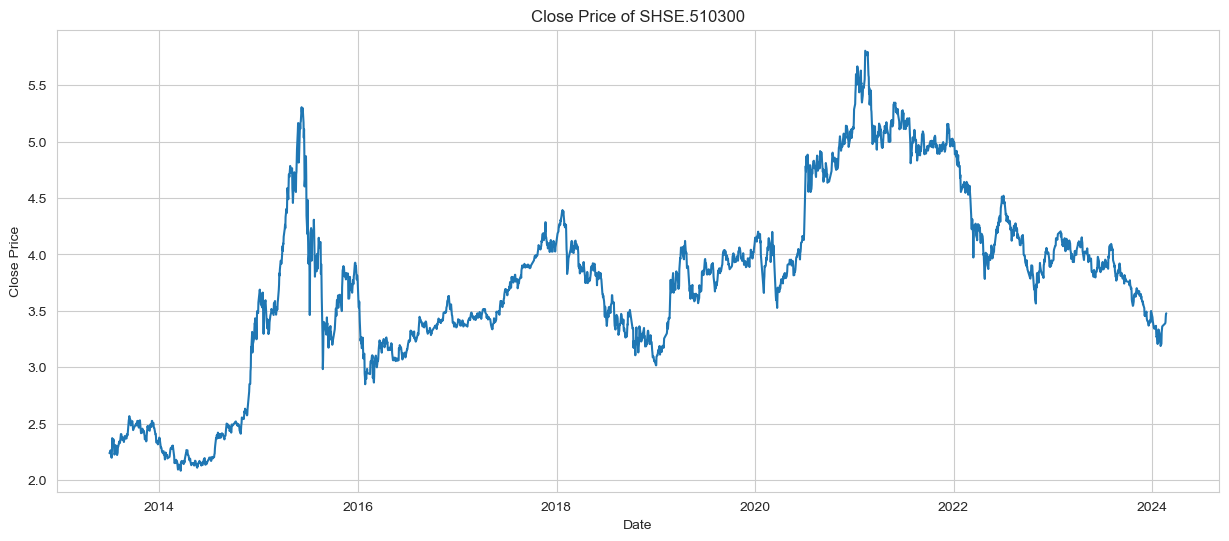

In [41]:
import pandas as pd
# 可视化trade_data.close
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(trade_data['close'])
# # 横坐标刻度包含月
# plt.xticks(pd.date_range(trade_data.index[0], trade_data.index[-1], freq='M'), rotation=45)

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price of SHSE.510300')
plt.show()

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# 首先，确认可用的样式
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


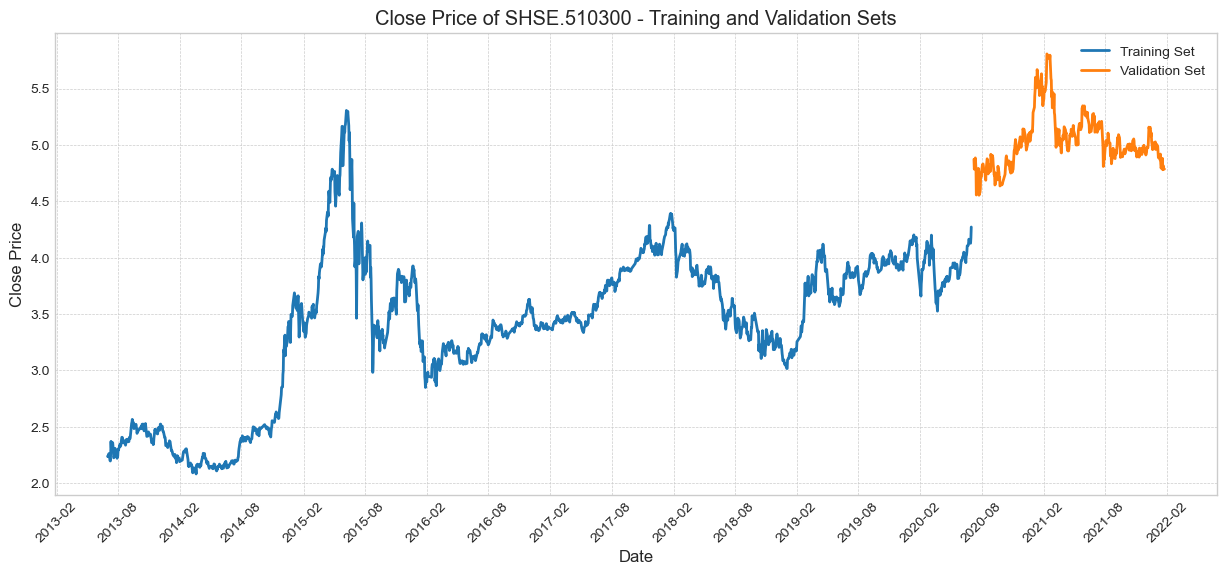

In [15]:

# 创建图表
plt.figure(figsize=(15, 6))
plt.style.use('seaborn-v0_8-whitegrid')  # 使用 seaborn 的暗色样式

# 定义训练集和验证集的时间范围
train_start_date = '2013-07-01'
train_end_date = '2020-07-01'
val_start_date = '2020-07-09'
val_end_date = '2022-01-24'

# 提取训练集和验证集
train_data = trade_data.loc[train_start_date:train_end_date]
val_data = trade_data.loc[val_start_date:val_end_date]

# 绘制训练集和验证集的`close`价格
plt.plot(train_data.index, train_data['close'], label='Training Set', color='#1f77b4', linewidth=2)
plt.plot(val_data.index, val_data['close'], label='Validation Set', color='#ff7f0e', linewidth=2)

# 设置日期格式
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # 每6个月标记一次
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 设置日期格式
plt.xticks(rotation=45)

# 添加网格线
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# 增加图例
plt.legend()

# 添加坐标轴标签和标题
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price of SHSE.510300 - Training and Validation Sets')

# 显示图表
plt.show()


# LSTM实验结果分析

In [1]:
import pandas as pd
from model.LSTM_base_model import best_lstms,test_start_date,test_end_date,lstm_predict,evaluate,T_values

## 验证集

### 考察全部模型

In [9]:
config_id = 6

model_results = pd.read_excel(f'best_models_results/best_models_results_{config_id}.xlsx')
# 修改列名 best_model_path为model_path
model_results.rename(columns={'best_model_path':'model_path'},inplace=True)
model_results

,T,window_size,hidden_dim,num_layers,best_val_loss,model_path
0,1,20,30,3,0.00014396,lstm_models_6\best_lstm_model_T1_window20_hidd...
1,1,20,30,5,0.00014290,lstm_models_6\best_lstm_model_T1_window20_hidd...
2,1,20,30,9,0.00014169,lstm_models_6\best_lstm_model_T1_window20_hidd...
3,1,20,50,3,0.00014666,lstm_models_6\best_lstm_model_T1_window20_hidd...
4,1,20,50,5,0.00014071,lstm_models_6\best_lstm_model_T1_window20_hidd...
...,...,...,...,...,...,...
1075,30,120,50,5,0.00000190,lstm_models_6\best_lstm_model_T30_window120_hi...
1076,30,120,50,9,0.00000342,lstm_models_6\best_lstm_model_T30_window120_hi...
1077,30,120,70,3,0.00000176,lstm_models_6\best_lstm_model_T30_window120_hi...
1078,30,120,70,5,0.00000268,lstm_models_6\best_lstm_model_T30_window120_hi...


In [ ]:
from model.LSTM_base_model import lstm_evaluate
from tqdm import tqdm

r2_list = []
# 遍历 model_results 每行
# for i in range(0,len(model_results)):
for i in tqdm(range(0,len(model_results))):
    model_dict = model_results.iloc[i].to_dict()
    T,r2 = lstm_evaluate(model_dict, "val",only_r2=True)
    # 将(T,r2)加入列表
    r2_list.append((T, r2))
# save
pd.DataFrame(r2_list,columns=['T','R2']).to_excel(f'../results/LSTM/lstm_val_T_R2_6.xlsx',index=False)

 24%|██▍       | 257/1080 [05:20<16:13,  1.18s/it]

In [ ]:
lstm_all_r2_list = pd.read_excel(f'../results/LSTM/lstm_val_T_R2_6.xlsx').values.tolist()

# 绘制 T-R2
from matplotlib import pyplot as plt

# 将列表转换为DataFrame以便绘图
r2_df = pd.DataFrame(lstm_all_r2_list, columns=['T', 'R2'])

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.plot(r2_df['T'], r2_df['R2'], 'o')
plt.xlabel('T')
plt.ylabel('R2')
plt.title('T - R2')
# 绘制包络线

# 保存图表
plt.savefig(f'../results/val_T_R2_{config_id}.png')
plt.show()


### best_lstms

In [10]:
from model.LSTM_base_model import best_lstms,lstm_evaluate

best_lstms = best_lstms(topK=30)
best_lstms

Running best_lstms: 100%|██████████| 30/30 [00:36<00:00,  1.23s/it]


[{'T': 15,
  'window_size': 120,
  'hidden_dim': 70,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T15_window120_hidden70_layers3.pth',
  'val_r2': (15, 0.6489262184226525)},
 {'T': 14,
  'window_size': 120,
  'hidden_dim': 70,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T14_window120_hidden70_layers3.pth',
  'val_r2': (14, 0.626332368528515)},
 {'T': 8,
  'window_size': 120,
  'hidden_dim': 50,
  'num_layers': 5,
  'model_path': 'lstm_models_6\\best_lstm_model_T8_window120_hidden50_layers5.pth',
  'val_r2': (8, 0.6261037789585329)},
 {'T': 13,
  'window_size': 120,
  'hidden_dim': 70,
  'num_layers': 5,
  'model_path': 'lstm_models_6\\best_lstm_model_T13_window120_hidden70_layers5.pth',
  'val_r2': (13, 0.621199367586595)},
 {'T': 12,
  'window_size': 120,
  'hidden_dim': 70,
  'num_layers': 5,
  'model_path': 'lstm_models_6\\best_lstm_model_T12_window120_hidden70_layers5.pth',
  'val_r2': (12, 0.6107278780684833)},
 {'T': 9,
  'window_size'

In [11]:
# 将best_lstms转换为df
best_lstms_df = pd.DataFrame(best_lstms)
best_lstms_df

,T,window_size,hidden_dim,num_layers,model_path,val_r2
0,15,120,70,3,lstm_models_6\best_lstm_model_T15_window120_hi...,"(15, 0.6489262184226525)"
1,14,120,70,3,lstm_models_6\best_lstm_model_T14_window120_hi...,"(14, 0.626332368528515)"
2,8,120,50,5,lstm_models_6\best_lstm_model_T8_window120_hid...,"(8, 0.6261037789585329)"
3,13,120,70,5,lstm_models_6\best_lstm_model_T13_window120_hi...,"(13, 0.621199367586595)"
4,12,120,70,5,lstm_models_6\best_lstm_model_T12_window120_hi...,"(12, 0.6107278780684833)"
5,9,120,70,5,lstm_models_6\best_lstm_model_T9_window120_hid...,"(9, 0.6064236440138466)"
6,26,120,30,3,lstm_models_6\best_lstm_model_T26_window120_hi...,"(26, 0.6008881220049334)"
7,22,120,50,5,lstm_models_6\best_lstm_model_T22_window120_hi...,"(22, 0.5857516964712015)"
8,6,40,70,9,lstm_models_6\best_lstm_model_T6_window40_hidd...,"(6, 0.5752051764939596)"
9,10,120,70,3,lstm_models_6\best_lstm_model_T10_window120_hi...,"(10, 0.5711711589821453)"


In [12]:
# 按照T升序排列
best_lstms_df.sort_values(by='T',inplace=True)
# T作为索引
best_lstms_df.set_index('T',inplace=True)
# val_r2 = val_r2[1]
best_lstms_df['val_r2'] = best_lstms_df['val_r2'].apply(lambda x: x[1])

best_lstms_df

,window_size,hidden_dim,num_layers,model_path,val_r2
T,,,,,
1,20,50,5,lstm_models_6\best_lstm_model_T1_window20_hidd...,0.00787554
2,60,70,5,lstm_models_6\best_lstm_model_T2_window60_hidd...,0.39951480
3,120,50,5,lstm_models_6\best_lstm_model_T3_window120_hid...,0.44966536
4,120,50,5,lstm_models_6\best_lstm_model_T4_window120_hid...,0.52292457
5,120,50,5,lstm_models_6\best_lstm_model_T5_window120_hid...,0.49491803
6,40,70,9,lstm_models_6\best_lstm_model_T6_window40_hidd...,0.57520518
7,120,30,5,lstm_models_6\best_lstm_model_T7_window120_hid...,0.55188421
8,120,50,5,lstm_models_6\best_lstm_model_T8_window120_hid...,0.62610378
9,120,70,5,lstm_models_6\best_lstm_model_T9_window120_hid...,0.60642364


In [13]:
# 保存为excel
best_lstms_df.to_excel(f'../results/LSTM/best_lstms_all_{config_id}.xlsx')

### 验证集best_lstms R2

In [12]:
import pandas as pd

config_id = 6

best_lstms_df = pd.read_excel(f'../results/LSTM/best_lstms_all_{config_id}.xlsx')
# T作为索引
best_lstms_df.set_index('T',inplace=True)
# 从best_lstms_df中提取T和R2
lstm_val_r2 = best_lstms_df['val_r2']
# 修改列名为 R2
lstm_val_r2.name = 'R2'
lstm_val_r2

T
1     0.007876
2     0.399515
3     0.449665
4     0.522925
5     0.494918
6     0.575205
7     0.551884
8     0.626104
9     0.606424
10    0.571171
11    0.555441
12    0.610728
13    0.621199
14    0.626332
15    0.648926
16    0.570592
17    0.534769
18    0.547073
19    0.567340
20    0.554199
21    0.539997
22    0.585752
23    0.513642
24    0.518933
25    0.526212
26    0.600888
27    0.476966
28    0.549575
29    0.541994
30    0.450081
Name: R2, dtype: float64

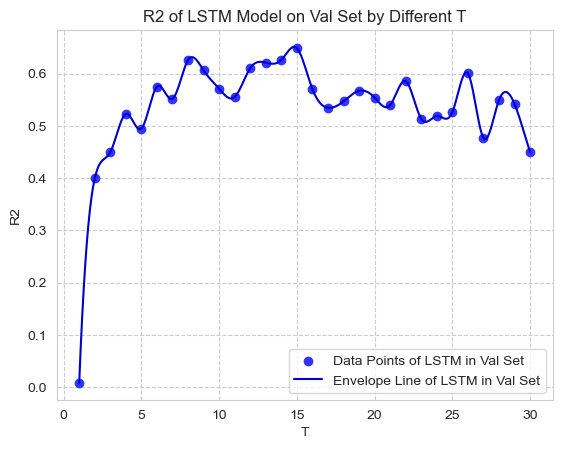

In [13]:

from result_analysis import single_scatter_with_envelope

single_scatter_with_envelope(lstm_val_r2,base_color='blue',marker='o',model_name='LSTM',set='Val',save_path=f'../results/LSTM/lstm_val_T_R2_best_{config_id}.png')

### 验证集策略效果

In [4]:
import  pandas as pd
lstm_val_backtest = pd.read_excel('../results/strategy/lstm_T_all_val_backtest.xlsx')
benchmark_return = 0.27*0.01
lstm_val_backtest['Excess_return'] = lstm_val_backtest['pnl_ratio'] - benchmark_return
lstm_val_backtest

,params,T,threshold,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual,Excess_return
0,"{'T': 1, 'threshold': 0.001}",1,0.001,0.198876,0.717906,0.100633,0.128477,0.196176
1,"{'T': 2, 'threshold': 0.001}",2,0.001,0.042476,0.214234,0.142645,0.027440,0.039776
2,"{'T': 3, 'threshold': 0.001}",3,0.001,-0.264179,-1.478508,0.271635,-0.170664,-0.266879
3,"{'T': 4, 'threshold': 0.001}",4,0.001,0.931231,3.637328,0.047830,0.601591,0.928531
4,"{'T': 5, 'threshold': 0.001}",5,0.001,0.895483,3.523076,0.050015,0.578498,0.892783
5,"{'T': 6, 'threshold': 0.001}",6,0.001,0.857151,3.275171,0.034513,0.553735,0.854451
6,"{'T': 7, 'threshold': 0.001}",7,0.001,0.646467,2.726419,0.057159,0.417629,0.643767
7,"{'T': 8, 'threshold': 0.001}",8,0.001,0.704004,3.006525,0.049674,0.454799,0.701304
8,"{'T': 9, 'threshold': 0.001}",9,0.001,0.656873,2.818216,0.057158,0.424352,0.654173
9,"{'T': 10, 'threshold': 0.001}",10,0.001,0.404934,1.755130,0.067769,0.261594,0.402234


In [5]:
# 从lstm_val_backtest中提取T和excess_return为
series = lstm_val_backtest.set_index('T')['Excess_return']
# 为索引设置名字
series.index.name = 'T'

series

T
1     0.196176
2     0.039776
3    -0.266879
4     0.928531
5     0.892783
6     0.854451
7     0.643767
8     0.701304
9     0.654173
10    0.402234
11    0.499323
12    0.404708
13    0.422109
14    0.339146
15    0.386670
16    0.446835
17    0.408782
18    0.278039
19    0.240249
20    0.272258
21    0.231512
22    0.278290
23    0.260744
24    0.146384
25    0.233024
26    0.298154
27    0.149729
28    0.224066
29    0.278784
30    0.092518
Name: Excess_return, dtype: float64

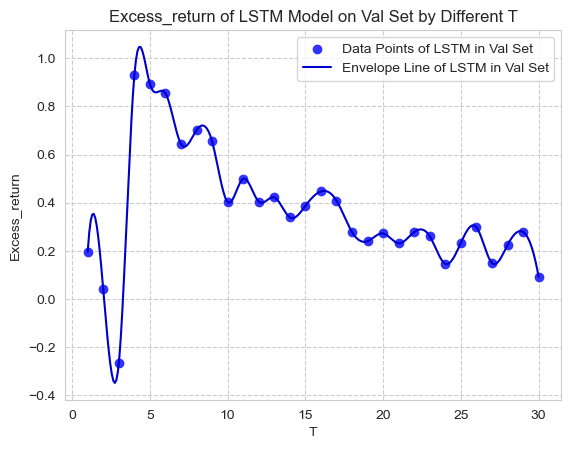

In [6]:

from result_analysis import single_scatter_with_envelope

single_scatter_with_envelope(series, base_color='blue',marker='o',model_name='LSTM',set='Val',save_path=f'../results/LSTM/lstm_val_strategy.png')

## 测试集

In [9]:
config_id = 6



# 加载最佳模型
best_lstm = best_lstms()
best_lstm

[{'T': 1,
  'window_size': 20,
  'hidden_dim': 30,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T1_window20_hidden30_layers3.pth'},
 {'T': 2,
  'window_size': 20,
  'hidden_dim': 30,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T2_window20_hidden30_layers3.pth'},
 {'T': 3,
  'window_size': 20,
  'hidden_dim': 30,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T3_window20_hidden30_layers3.pth'},
 {'T': 4,
  'window_size': 20,
  'hidden_dim': 30,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T4_window20_hidden30_layers3.pth'},
 {'T': 5,
  'window_size': 20,
  'hidden_dim': 30,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T5_window20_hidden30_layers3.pth'},
 {'T': 6,
  'window_size': 20,
  'hidden_dim': 30,
  'num_layers': 3,
  'model_path': 'lstm_models_6\\best_lstm_model_T6_window20_hidden30_layers3.pth'},
 {'T': 7,
  'window_size': 20,
  'hidden_dim': 30,
  'num_layers': 3,
  'mod

In [10]:
r2_dict = {}
for model_dict in best_lstm:
    T,r2 = evaluate(model_dict, "test",only_r2=True)
    r2_dict[T] = r2

In [23]:
r2_dict

#保存
pd.DataFrame(r2_dict.items(),columns=['T','R2']).to_excel(f'../results/lstm_test_T_R2_{config_id}.xlsx',index=False)

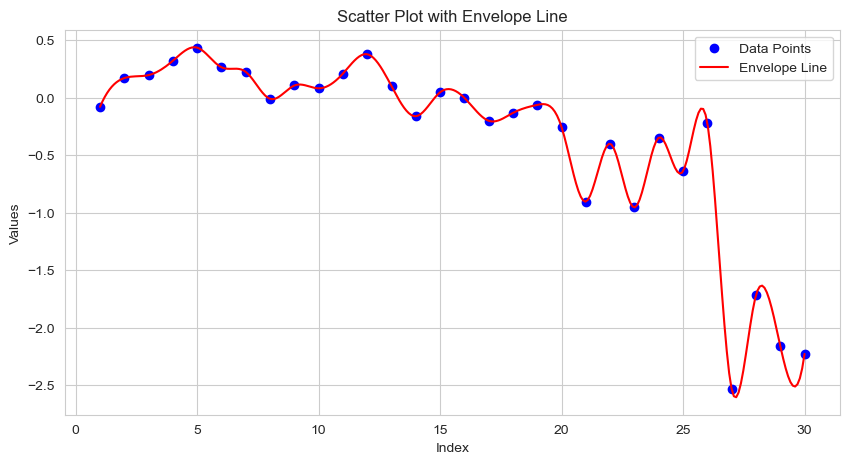

In [11]:
def plot_scatter_with_envelope(r2_dict):
    pass


plot_scatter_with_envelope(r2_dict)

## 测试集策略效果

In [12]:
import pandas as pd

lstm_strategy_path = "combined_model/lstm_T_all.xlsx"

lstm_strategy_result = pd.read_excel(lstm_strategy_path)

lstm_strategy_result

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual
0,"{'T': 1, 'threshold': 0.001}",-0.010768,-0.104736,0.111997,-0.012437
1,"{'T': 2, 'threshold': 0.001}",0.109568,1.208817,0.067829,0.126558
2,"{'T': 3, 'threshold': 0.001}",0.287824,3.228414,0.015770,0.332455
3,"{'T': 4, 'threshold': 0.001}",0.483721,4.091397,0.049985,0.558728
4,"{'T': 5, 'threshold': 0.001}",0.442383,4.115813,0.021913,0.510980
5,"{'T': 6, 'threshold': 0.001}",0.282213,2.489219,0.059628,0.325974
6,"{'T': 7, 'threshold': 0.001}",0.234714,1.909133,0.041161,0.271110
7,"{'T': 8, 'threshold': 0.001}",0.253834,2.125623,0.050462,0.293194
8,"{'T': 9, 'threshold': 0.001}",0.249619,3.102941,0.018427,0.288325
9,"{'T': 10, 'threshold': 0.001}",0.171889,1.468191,0.056713,0.198542


In [13]:
benchmark_return = 1.6*0.01
lstm_strategy_result['excess_return'] = lstm_strategy_result['pnl_ratio'] - benchmark_return
lstm_strategy_result

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual,excess_return
0,"{'T': 1, 'threshold': 0.001}",-0.010768,-0.104736,0.111997,-0.012437,-0.026768
1,"{'T': 2, 'threshold': 0.001}",0.109568,1.208817,0.067829,0.126558,0.093568
2,"{'T': 3, 'threshold': 0.001}",0.287824,3.228414,0.015770,0.332455,0.271824
3,"{'T': 4, 'threshold': 0.001}",0.483721,4.091397,0.049985,0.558728,0.467721
4,"{'T': 5, 'threshold': 0.001}",0.442383,4.115813,0.021913,0.510980,0.426383
5,"{'T': 6, 'threshold': 0.001}",0.282213,2.489219,0.059628,0.325974,0.266213
6,"{'T': 7, 'threshold': 0.001}",0.234714,1.909133,0.041161,0.271110,0.218714
7,"{'T': 8, 'threshold': 0.001}",0.253834,2.125623,0.050462,0.293194,0.237834
8,"{'T': 9, 'threshold': 0.001}",0.249619,3.102941,0.018427,0.288325,0.233619
9,"{'T': 10, 'threshold': 0.001}",0.171889,1.468191,0.056713,0.198542,0.155889


In [3]:
lstm_strategy_result
# 按照excess_return进行降序
lstm_strategy_result.sort_values(by='excess_return',ascending=False,inplace=True)
lstm_strategy_result

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual,excess_return
3,"{'T': 4, 'threshold': 0.001}",0.483721,4.091397,0.049985,0.558728,0.467721
4,"{'T': 5, 'threshold': 0.001}",0.442383,4.115813,0.021913,0.510980,0.426383
2,"{'T': 3, 'threshold': 0.001}",0.287824,3.228414,0.015770,0.332455,0.271824
5,"{'T': 6, 'threshold': 0.001}",0.282213,2.489219,0.059628,0.325974,0.266213
7,"{'T': 8, 'threshold': 0.001}",0.253834,2.125623,0.050462,0.293194,0.237834
8,"{'T': 9, 'threshold': 0.001}",0.249619,3.102941,0.018427,0.288325,0.233619
11,"{'T': 12, 'threshold': 0.001}",0.239955,2.176197,0.034185,0.277163,0.223955
6,"{'T': 7, 'threshold': 0.001}",0.234714,1.909133,0.041161,0.271110,0.218714
10,"{'T': 11, 'threshold': 0.001}",0.180735,1.680963,0.042579,0.208761,0.164735
9,"{'T': 10, 'threshold': 0.001}",0.171889,1.468191,0.056713,0.198542,0.155889


In [ ]:
import ast

# 使用apply函数将params列中的每个字符串转换为字典
lstm_strategy_result['params'] = lstm_strategy_result['params'].apply(ast.literal_eval)

# 现在你可以提取T值了
lstm_strategy_result['T'] = lstm_strategy_result['params'].apply(lambda x: x['T'])

In [24]:
# 保存
lstm_strategy_result.to_excel('strategy/lstm_backtest_results.xlsx',index=False)

# XGBOOST/FLIXNet 结果分析

## 验证集

In [ ]:
# from model.my_xgboost import xgb_evaluate
# import numpy as np
# 
# xgb_r2_dict = {}
# for target_T in tqdm(np.arange(1,31)):
#     r2 = xgb_evaluate(target_T, "val",only_r2=True)
#     xgb_r2_dict[target_T] = r2
#     
# xgb_r2_dict
    

Evaluating for different T values:   0%|          | 0/10 [00:00<?, ?it/s]

[0]	eval-rmse:0.01147
[1]	eval-rmse:0.01148
[2]	eval-rmse:0.01138
[3]	eval-rmse:0.01136
[4]	eval-rmse:0.01133
[5]	eval-rmse:0.01142
[6]	eval-rmse:0.01137
[7]	eval-rmse:0.01162
[8]	eval-rmse:0.01164
[9]	eval-rmse:0.01165
[10]	eval-rmse:0.01164
[11]	eval-rmse:0.01174
[12]	eval-rmse:0.01177
[13]	eval-rmse:0.01171
[14]	eval-rmse:0.01174
[15]	eval-rmse:0.01174
[16]	eval-rmse:0.01174
[17]	eval-rmse:0.01182
[18]	eval-rmse:0.01187
[19]	eval-rmse:0.01187
[20]	eval-rmse:0.01187
[21]	eval-rmse:0.01192
[22]	eval-rmse:0.01192
[23]	eval-rmse:0.01196
[24]	eval-rmse:0.01201
[25]	eval-rmse:0.01201
[26]	eval-rmse:0.01208
[27]	eval-rmse:0.01206
[28]	eval-rmse:0.01207
[29]	eval-rmse:0.01207
[30]	eval-rmse:0.01206
[31]	eval-rmse:0.01206
[32]	eval-rmse:0.01208
[33]	eval-rmse:0.01208
[34]	eval-rmse:0.01212
[35]	eval-rmse:0.01212
[36]	eval-rmse:0.01218
[37]	eval-rmse:0.01218
[38]	eval-rmse:0.01218
[39]	eval-rmse:0.01218
[40]	eval-rmse:0.01219
[41]	eval-rmse:0.01220
[42]	eval-rmse:0.01223
[43]	eval-rmse:0.0122

Evaluating for different T values:  10%|█         | 1/10 [00:53<08:04, 53.85s/it]

[0]	eval-rmse:0.00766
[1]	eval-rmse:0.00730
[2]	eval-rmse:0.00709
[3]	eval-rmse:0.00700
[4]	eval-rmse:0.00696
[5]	eval-rmse:0.00697
[6]	eval-rmse:0.00694
[7]	eval-rmse:0.00694
[8]	eval-rmse:0.00697
[9]	eval-rmse:0.00702
[10]	eval-rmse:0.00702
[11]	eval-rmse:0.00696
[12]	eval-rmse:0.00697
[13]	eval-rmse:0.00697
[14]	eval-rmse:0.00699
[15]	eval-rmse:0.00697
[16]	eval-rmse:0.00696
[17]	eval-rmse:0.00696
[18]	eval-rmse:0.00705
[19]	eval-rmse:0.00705
[20]	eval-rmse:0.00702
[21]	eval-rmse:0.00705
[22]	eval-rmse:0.00712
[23]	eval-rmse:0.00718
[24]	eval-rmse:0.00722
[25]	eval-rmse:0.00722
[26]	eval-rmse:0.00729
[27]	eval-rmse:0.00729
[28]	eval-rmse:0.00731
[29]	eval-rmse:0.00731
[30]	eval-rmse:0.00732
[31]	eval-rmse:0.00734
[32]	eval-rmse:0.00737
[33]	eval-rmse:0.00735
[34]	eval-rmse:0.00735
[35]	eval-rmse:0.00736
[36]	eval-rmse:0.00738
[37]	eval-rmse:0.00738
[38]	eval-rmse:0.00741
[39]	eval-rmse:0.00741
[40]	eval-rmse:0.00741
[41]	eval-rmse:0.00741
[42]	eval-rmse:0.00741
[43]	eval-rmse:0.0074

Evaluating for different T values:  20%|██        | 2/10 [01:47<07:09, 53.72s/it]

[0]	eval-rmse:0.00603
[1]	eval-rmse:0.00554
[2]	eval-rmse:0.00529
[3]	eval-rmse:0.00511
[4]	eval-rmse:0.00501
[5]	eval-rmse:0.00497
[6]	eval-rmse:0.00497
[7]	eval-rmse:0.00493
[8]	eval-rmse:0.00494
[9]	eval-rmse:0.00495
[10]	eval-rmse:0.00495
[11]	eval-rmse:0.00496
[12]	eval-rmse:0.00495
[13]	eval-rmse:0.00495
[14]	eval-rmse:0.00496
[15]	eval-rmse:0.00496
[16]	eval-rmse:0.00496
[17]	eval-rmse:0.00496
[18]	eval-rmse:0.00498
[19]	eval-rmse:0.00499
[20]	eval-rmse:0.00500
[21]	eval-rmse:0.00502
[22]	eval-rmse:0.00503
[23]	eval-rmse:0.00505
[24]	eval-rmse:0.00505
[25]	eval-rmse:0.00505
[26]	eval-rmse:0.00504
[27]	eval-rmse:0.00505
[28]	eval-rmse:0.00505
[29]	eval-rmse:0.00505
[30]	eval-rmse:0.00505
[31]	eval-rmse:0.00504
[32]	eval-rmse:0.00505
[33]	eval-rmse:0.00505
[34]	eval-rmse:0.00505
[35]	eval-rmse:0.00506
[36]	eval-rmse:0.00507
[37]	eval-rmse:0.00507
[38]	eval-rmse:0.00507
[39]	eval-rmse:0.00506
[40]	eval-rmse:0.00508
[41]	eval-rmse:0.00510
[42]	eval-rmse:0.00510
[43]	eval-rmse:0.0051

Evaluating for different T values:  30%|███       | 3/10 [02:41<06:16, 53.83s/it]

[0]	eval-rmse:0.00494
[1]	eval-rmse:0.00448
[2]	eval-rmse:0.00423
[3]	eval-rmse:0.00411
[4]	eval-rmse:0.00403
[5]	eval-rmse:0.00400
[6]	eval-rmse:0.00401
[7]	eval-rmse:0.00401
[8]	eval-rmse:0.00400
[9]	eval-rmse:0.00401
[10]	eval-rmse:0.00403
[11]	eval-rmse:0.00406
[12]	eval-rmse:0.00407
[13]	eval-rmse:0.00409
[14]	eval-rmse:0.00410
[15]	eval-rmse:0.00409
[16]	eval-rmse:0.00409
[17]	eval-rmse:0.00410
[18]	eval-rmse:0.00410
[19]	eval-rmse:0.00409
[20]	eval-rmse:0.00410
[21]	eval-rmse:0.00409
[22]	eval-rmse:0.00410
[23]	eval-rmse:0.00410
[24]	eval-rmse:0.00410
[25]	eval-rmse:0.00410
[26]	eval-rmse:0.00410
[27]	eval-rmse:0.00411
[28]	eval-rmse:0.00411
[29]	eval-rmse:0.00414
[30]	eval-rmse:0.00414
[31]	eval-rmse:0.00415
[32]	eval-rmse:0.00416
[33]	eval-rmse:0.00417
[34]	eval-rmse:0.00419
[35]	eval-rmse:0.00418
[36]	eval-rmse:0.00418
[37]	eval-rmse:0.00418
[38]	eval-rmse:0.00418
[39]	eval-rmse:0.00418
[40]	eval-rmse:0.00418
[41]	eval-rmse:0.00419
[42]	eval-rmse:0.00420
[43]	eval-rmse:0.0042

Evaluating for different T values:  40%|████      | 4/10 [03:34<05:22, 53.72s/it]

[0]	eval-rmse:0.00442
[1]	eval-rmse:0.00404
[2]	eval-rmse:0.00383
[3]	eval-rmse:0.00369
[4]	eval-rmse:0.00362
[5]	eval-rmse:0.00359
[6]	eval-rmse:0.00357
[7]	eval-rmse:0.00356
[8]	eval-rmse:0.00356
[9]	eval-rmse:0.00359
[10]	eval-rmse:0.00358
[11]	eval-rmse:0.00358
[12]	eval-rmse:0.00358
[13]	eval-rmse:0.00358
[14]	eval-rmse:0.00359
[15]	eval-rmse:0.00358
[16]	eval-rmse:0.00358
[17]	eval-rmse:0.00359
[18]	eval-rmse:0.00360
[19]	eval-rmse:0.00361
[20]	eval-rmse:0.00361
[21]	eval-rmse:0.00360
[22]	eval-rmse:0.00361
[23]	eval-rmse:0.00361
[24]	eval-rmse:0.00361
[25]	eval-rmse:0.00362
[26]	eval-rmse:0.00363
[27]	eval-rmse:0.00364
[28]	eval-rmse:0.00363
[29]	eval-rmse:0.00363
[30]	eval-rmse:0.00363
[31]	eval-rmse:0.00366
[32]	eval-rmse:0.00366
[33]	eval-rmse:0.00367
[34]	eval-rmse:0.00367
[35]	eval-rmse:0.00367
[36]	eval-rmse:0.00368
[37]	eval-rmse:0.00367
[38]	eval-rmse:0.00369
[39]	eval-rmse:0.00370
[40]	eval-rmse:0.00370
[41]	eval-rmse:0.00371
[42]	eval-rmse:0.00371
[43]	eval-rmse:0.0037

Evaluating for different T values:  50%|█████     | 5/10 [04:28<04:28, 53.64s/it]

[0]	eval-rmse:0.00399
[1]	eval-rmse:0.00363
[2]	eval-rmse:0.00342
[3]	eval-rmse:0.00332
[4]	eval-rmse:0.00326
[5]	eval-rmse:0.00323
[6]	eval-rmse:0.00322
[7]	eval-rmse:0.00320
[8]	eval-rmse:0.00319
[9]	eval-rmse:0.00319
[10]	eval-rmse:0.00319
[11]	eval-rmse:0.00318
[12]	eval-rmse:0.00318
[13]	eval-rmse:0.00319
[14]	eval-rmse:0.00319
[15]	eval-rmse:0.00319
[16]	eval-rmse:0.00319
[17]	eval-rmse:0.00320
[18]	eval-rmse:0.00321
[19]	eval-rmse:0.00322
[20]	eval-rmse:0.00323
[21]	eval-rmse:0.00323
[22]	eval-rmse:0.00323
[23]	eval-rmse:0.00322
[24]	eval-rmse:0.00322
[25]	eval-rmse:0.00322
[26]	eval-rmse:0.00324
[27]	eval-rmse:0.00324
[28]	eval-rmse:0.00325
[29]	eval-rmse:0.00325
[30]	eval-rmse:0.00325
[31]	eval-rmse:0.00325
[32]	eval-rmse:0.00325
[33]	eval-rmse:0.00325
[34]	eval-rmse:0.00325
[35]	eval-rmse:0.00325
[36]	eval-rmse:0.00324
[37]	eval-rmse:0.00325
[38]	eval-rmse:0.00326
[39]	eval-rmse:0.00326
[40]	eval-rmse:0.00326
[41]	eval-rmse:0.00327
[42]	eval-rmse:0.00326
[43]	eval-rmse:0.0032

Evaluating for different T values:  60%|██████    | 6/10 [05:22<03:34, 53.67s/it]

[0]	eval-rmse:0.00357
[1]	eval-rmse:0.00323
[2]	eval-rmse:0.00305
[3]	eval-rmse:0.00297
[4]	eval-rmse:0.00293
[5]	eval-rmse:0.00291
[6]	eval-rmse:0.00290
[7]	eval-rmse:0.00291
[8]	eval-rmse:0.00291
[9]	eval-rmse:0.00291
[10]	eval-rmse:0.00292
[11]	eval-rmse:0.00292
[12]	eval-rmse:0.00292
[13]	eval-rmse:0.00293
[14]	eval-rmse:0.00293
[15]	eval-rmse:0.00295
[16]	eval-rmse:0.00295
[17]	eval-rmse:0.00295
[18]	eval-rmse:0.00295
[19]	eval-rmse:0.00296
[20]	eval-rmse:0.00296
[21]	eval-rmse:0.00296
[22]	eval-rmse:0.00296
[23]	eval-rmse:0.00296
[24]	eval-rmse:0.00298
[25]	eval-rmse:0.00296
[26]	eval-rmse:0.00297
[27]	eval-rmse:0.00297
[28]	eval-rmse:0.00297
[29]	eval-rmse:0.00297
[30]	eval-rmse:0.00297
[31]	eval-rmse:0.00298
[32]	eval-rmse:0.00297
[33]	eval-rmse:0.00297
[34]	eval-rmse:0.00297
[35]	eval-rmse:0.00298
[36]	eval-rmse:0.00296
[37]	eval-rmse:0.00296
[38]	eval-rmse:0.00296
[39]	eval-rmse:0.00297
[40]	eval-rmse:0.00299
[41]	eval-rmse:0.00299
[42]	eval-rmse:0.00299
[43]	eval-rmse:0.0029

Evaluating for different T values:  70%|███████   | 7/10 [06:15<02:40, 53.52s/it]

[0]	eval-rmse:0.00322
[1]	eval-rmse:0.00291
[2]	eval-rmse:0.00275
[3]	eval-rmse:0.00268
[4]	eval-rmse:0.00265
[5]	eval-rmse:0.00264
[6]	eval-rmse:0.00263
[7]	eval-rmse:0.00264
[8]	eval-rmse:0.00264
[9]	eval-rmse:0.00265
[10]	eval-rmse:0.00265
[11]	eval-rmse:0.00266
[12]	eval-rmse:0.00267
[13]	eval-rmse:0.00267
[14]	eval-rmse:0.00267
[15]	eval-rmse:0.00267
[16]	eval-rmse:0.00267
[17]	eval-rmse:0.00267
[18]	eval-rmse:0.00268
[19]	eval-rmse:0.00268
[20]	eval-rmse:0.00268
[21]	eval-rmse:0.00268
[22]	eval-rmse:0.00268
[23]	eval-rmse:0.00268
[24]	eval-rmse:0.00268
[25]	eval-rmse:0.00268
[26]	eval-rmse:0.00268
[27]	eval-rmse:0.00268
[28]	eval-rmse:0.00269
[29]	eval-rmse:0.00269
[30]	eval-rmse:0.00269
[31]	eval-rmse:0.00269
[32]	eval-rmse:0.00269
[33]	eval-rmse:0.00269
[34]	eval-rmse:0.00269
[35]	eval-rmse:0.00269
[36]	eval-rmse:0.00269
[37]	eval-rmse:0.00269
[38]	eval-rmse:0.00269
[39]	eval-rmse:0.00269
[40]	eval-rmse:0.00269
[41]	eval-rmse:0.00269
[42]	eval-rmse:0.00269
[43]	eval-rmse:0.0026

Evaluating for different T values:  80%|████████  | 8/10 [07:08<01:46, 53.33s/it]

[0]	eval-rmse:0.00299
[1]	eval-rmse:0.00279
[2]	eval-rmse:0.00266
[3]	eval-rmse:0.00257
[4]	eval-rmse:0.00253
[5]	eval-rmse:0.00252
[6]	eval-rmse:0.00252
[7]	eval-rmse:0.00252
[8]	eval-rmse:0.00251
[9]	eval-rmse:0.00251
[10]	eval-rmse:0.00251
[11]	eval-rmse:0.00251
[12]	eval-rmse:0.00251
[13]	eval-rmse:0.00252
[14]	eval-rmse:0.00253
[15]	eval-rmse:0.00253
[16]	eval-rmse:0.00253
[17]	eval-rmse:0.00254
[18]	eval-rmse:0.00253
[19]	eval-rmse:0.00254
[20]	eval-rmse:0.00253
[21]	eval-rmse:0.00254
[22]	eval-rmse:0.00254
[23]	eval-rmse:0.00256
[24]	eval-rmse:0.00256
[25]	eval-rmse:0.00256
[26]	eval-rmse:0.00256
[27]	eval-rmse:0.00256
[28]	eval-rmse:0.00256
[29]	eval-rmse:0.00257
[30]	eval-rmse:0.00257
[31]	eval-rmse:0.00257
[32]	eval-rmse:0.00257
[33]	eval-rmse:0.00257
[34]	eval-rmse:0.00257
[35]	eval-rmse:0.00257
[36]	eval-rmse:0.00257
[37]	eval-rmse:0.00257
[38]	eval-rmse:0.00257
[39]	eval-rmse:0.00257
[40]	eval-rmse:0.00257
[41]	eval-rmse:0.00257
[42]	eval-rmse:0.00257
[43]	eval-rmse:0.0025

Evaluating for different T values:  90%|█████████ | 9/10 [08:02<00:53, 53.48s/it]

[0]	eval-rmse:0.00279
[1]	eval-rmse:0.00259
[2]	eval-rmse:0.00242
[3]	eval-rmse:0.00237
[4]	eval-rmse:0.00232
[5]	eval-rmse:0.00229
[6]	eval-rmse:0.00227
[7]	eval-rmse:0.00226
[8]	eval-rmse:0.00226
[9]	eval-rmse:0.00226
[10]	eval-rmse:0.00225
[11]	eval-rmse:0.00225
[12]	eval-rmse:0.00226
[13]	eval-rmse:0.00226
[14]	eval-rmse:0.00228
[15]	eval-rmse:0.00229
[16]	eval-rmse:0.00230
[17]	eval-rmse:0.00230
[18]	eval-rmse:0.00230
[19]	eval-rmse:0.00230
[20]	eval-rmse:0.00230
[21]	eval-rmse:0.00230
[22]	eval-rmse:0.00229
[23]	eval-rmse:0.00229
[24]	eval-rmse:0.00229
[25]	eval-rmse:0.00229
[26]	eval-rmse:0.00229
[27]	eval-rmse:0.00229
[28]	eval-rmse:0.00229
[29]	eval-rmse:0.00229
[30]	eval-rmse:0.00229
[31]	eval-rmse:0.00229
[32]	eval-rmse:0.00229
[33]	eval-rmse:0.00229
[34]	eval-rmse:0.00229
[35]	eval-rmse:0.00229
[36]	eval-rmse:0.00229
[37]	eval-rmse:0.00229
[38]	eval-rmse:0.00229
[39]	eval-rmse:0.00229
[40]	eval-rmse:0.00229
[41]	eval-rmse:0.00229
[42]	eval-rmse:0.00229
[43]	eval-rmse:0.0022

Evaluating for different T values: 100%|██████████| 10/10 [08:55<00:00, 53.54s/it]


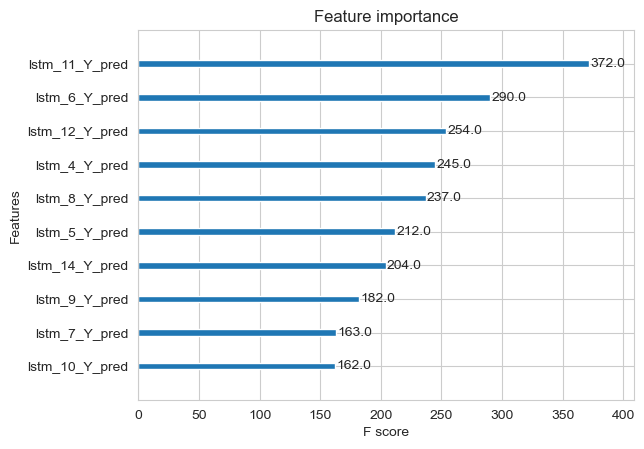

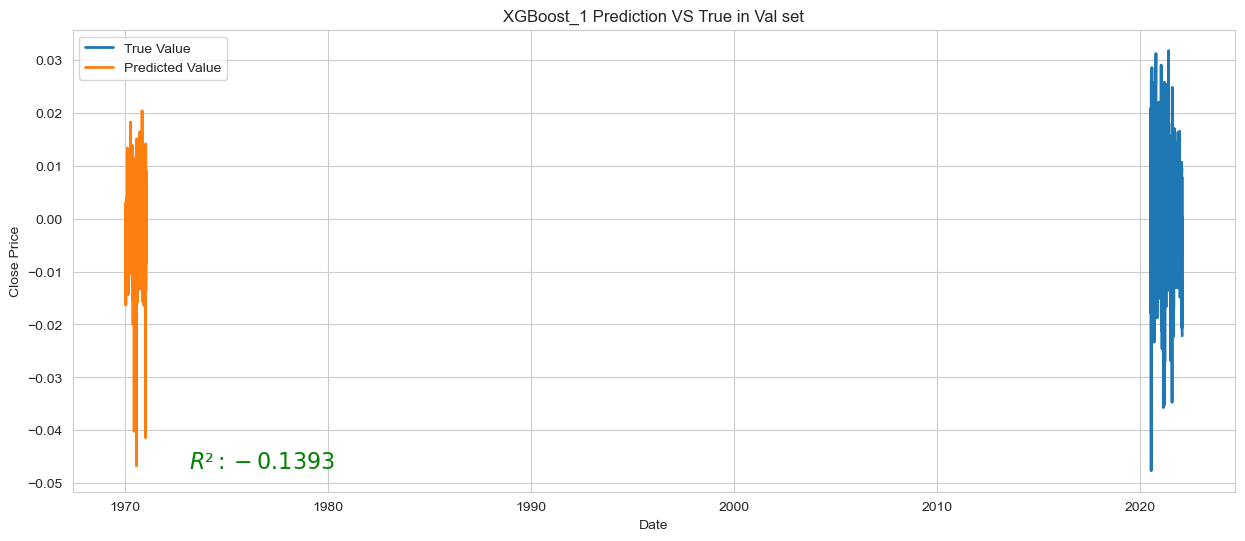

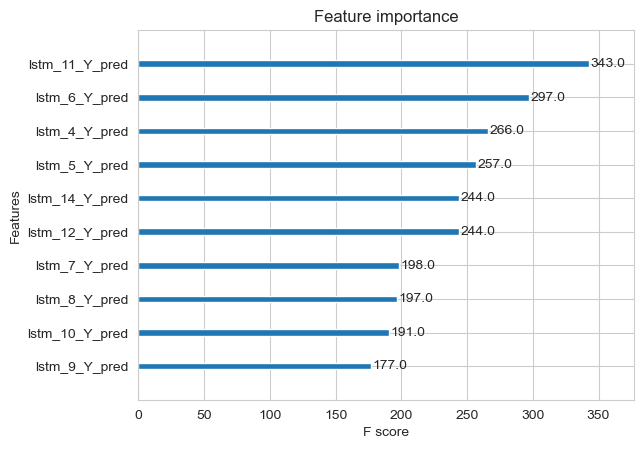

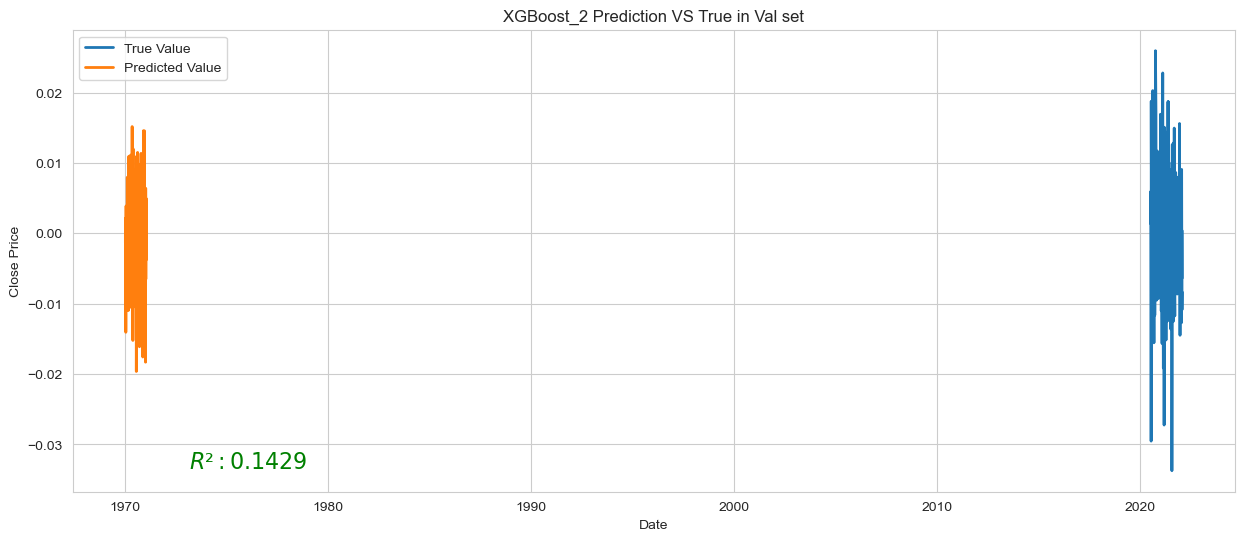

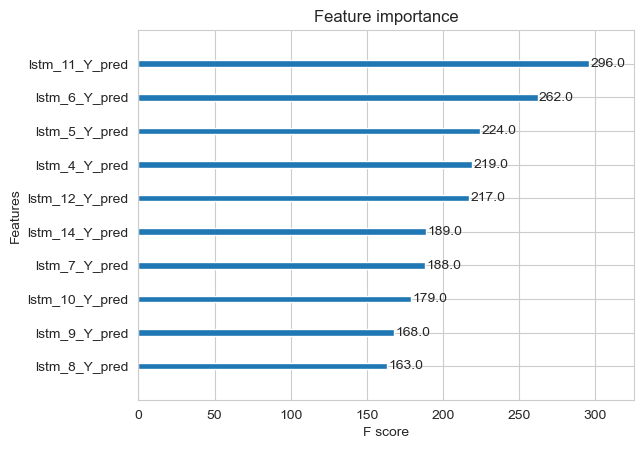

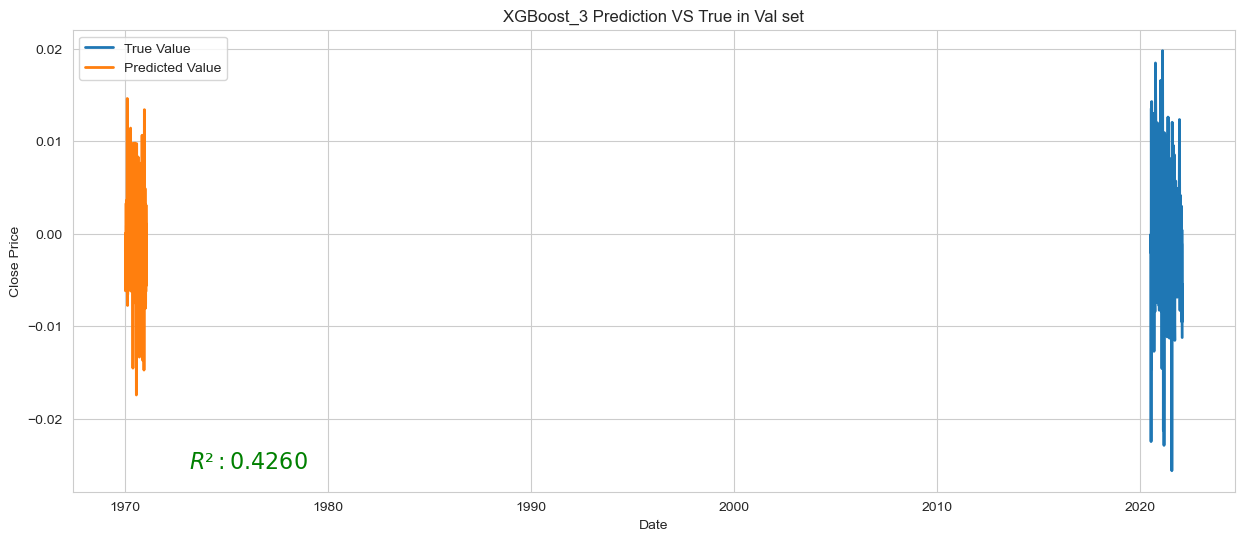

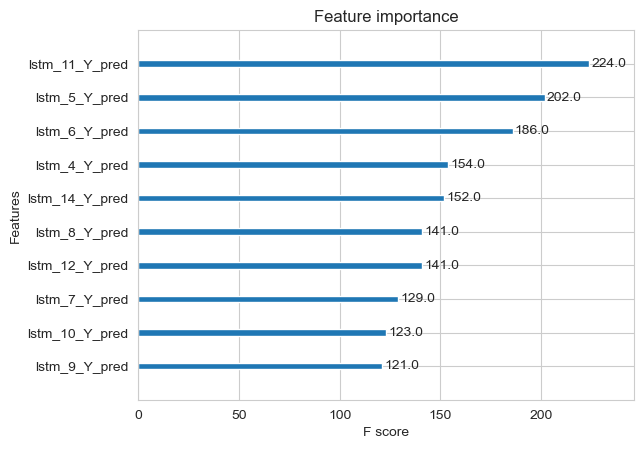

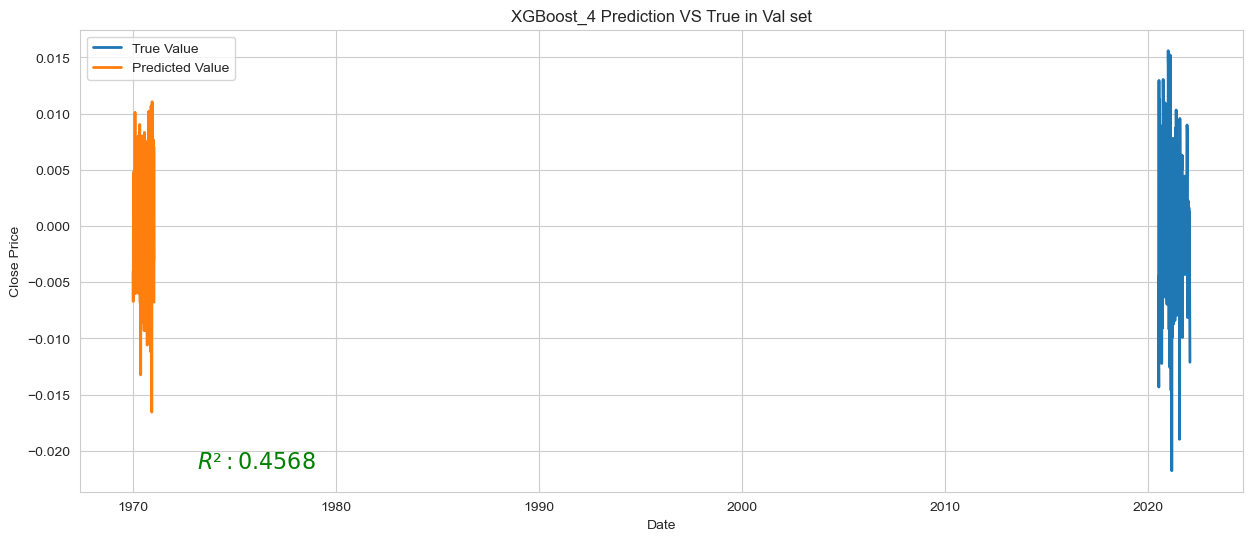

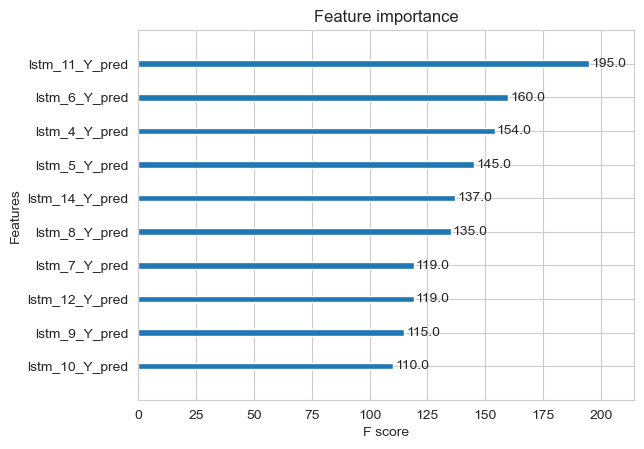

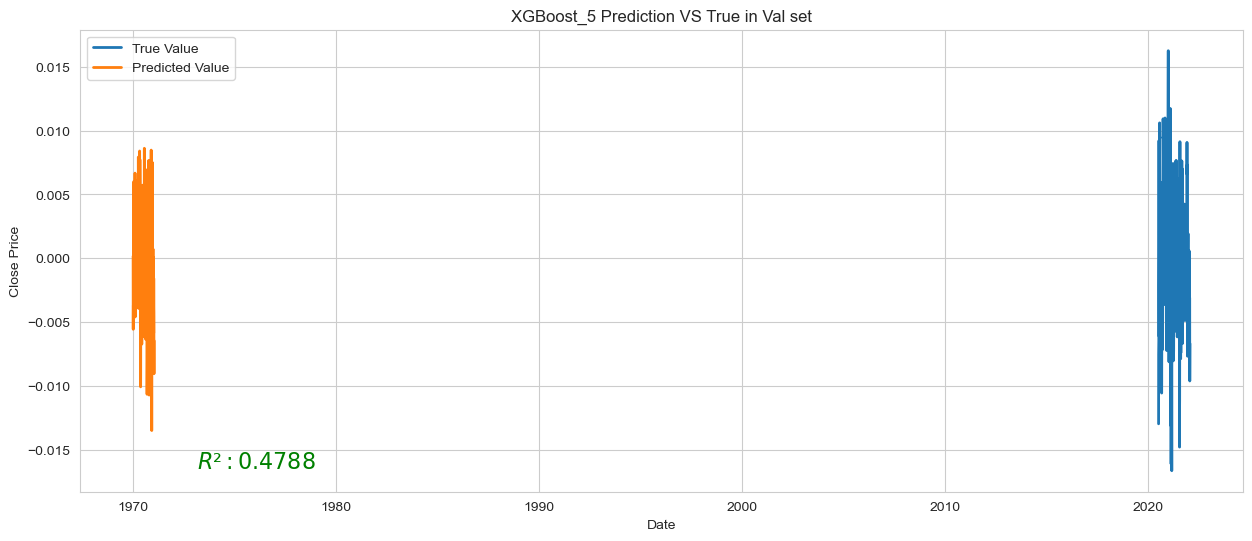

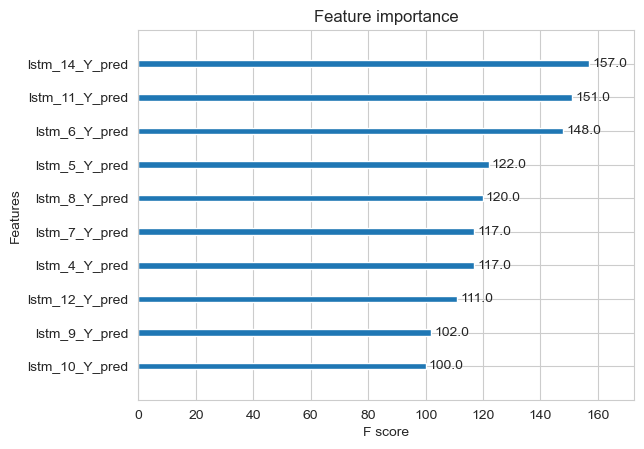

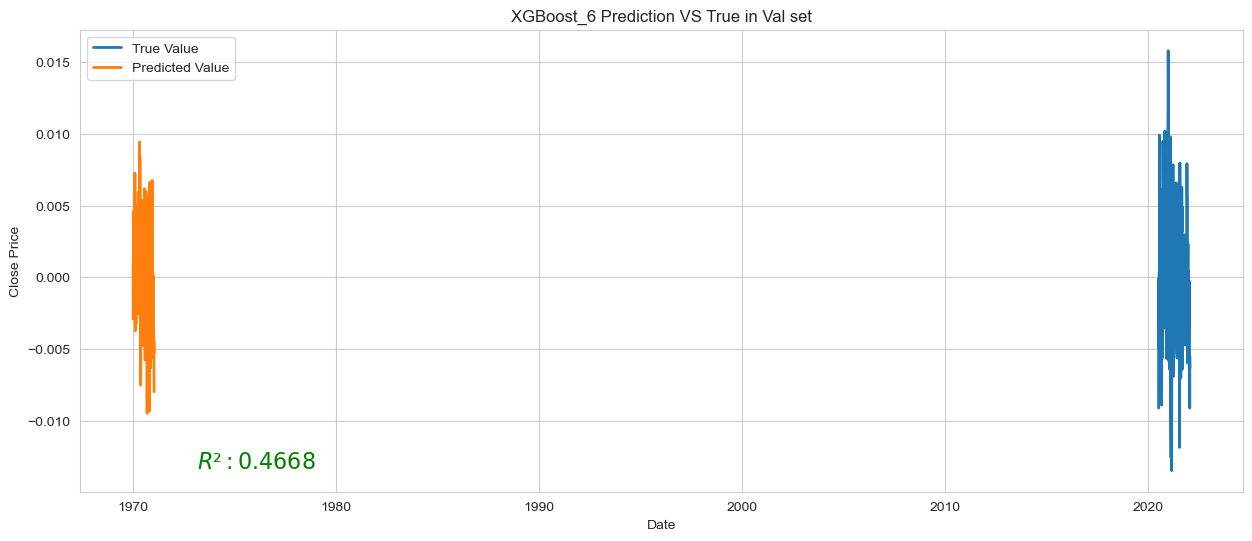

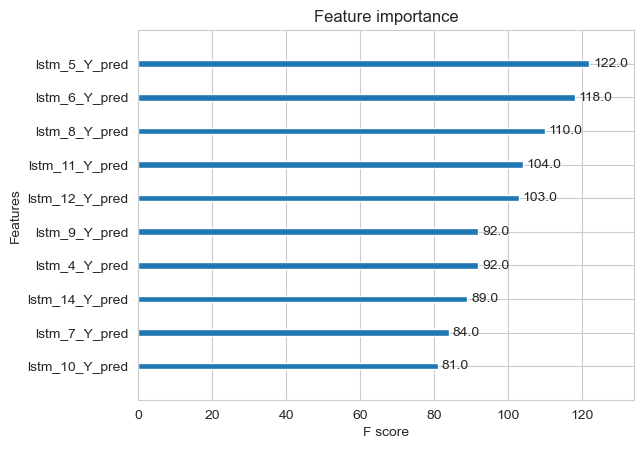

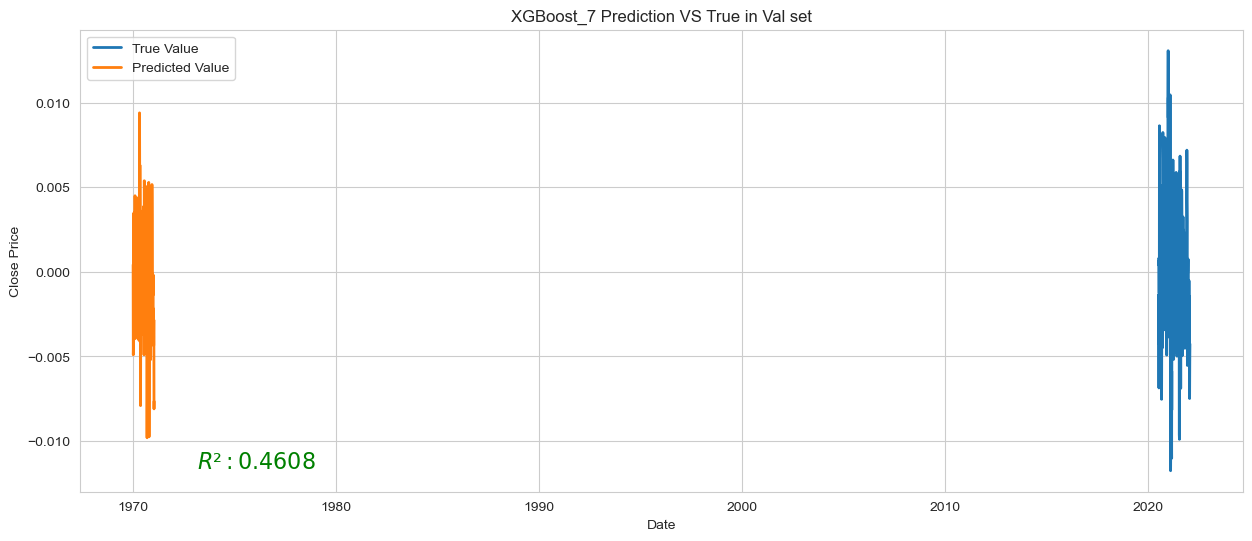

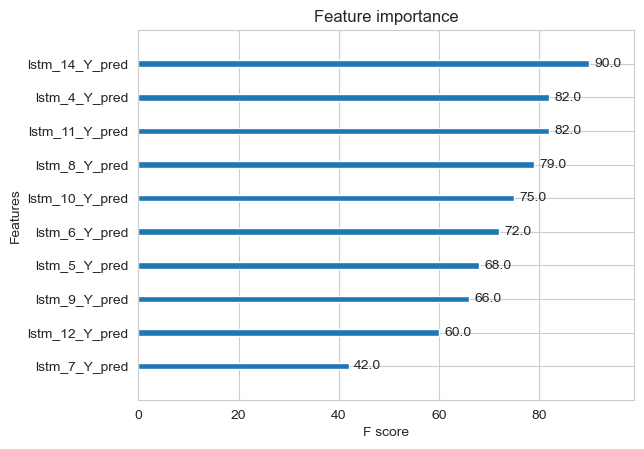

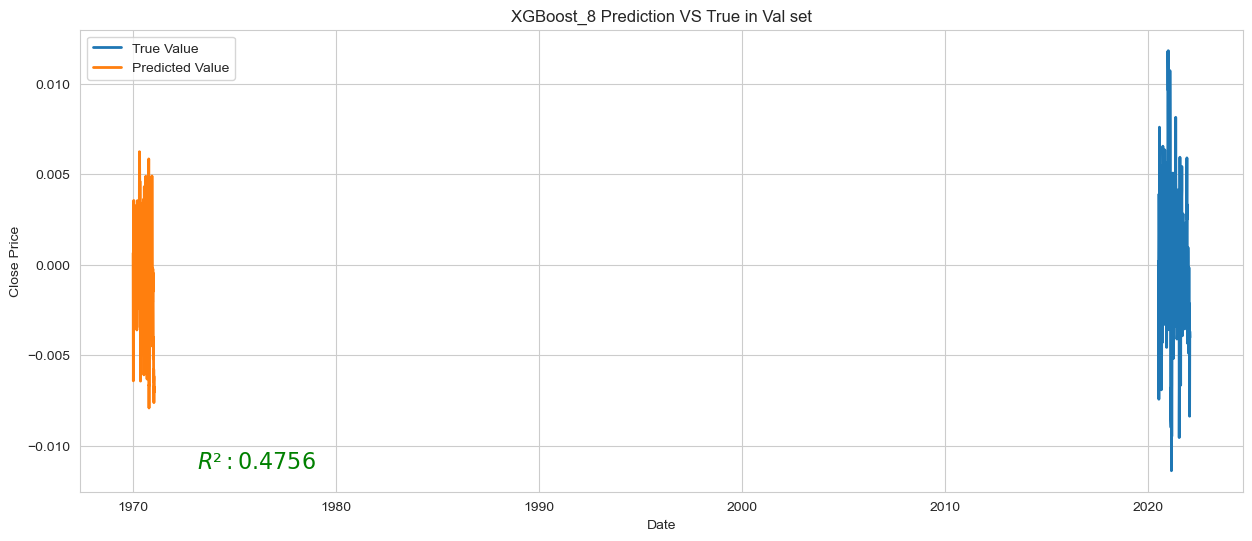

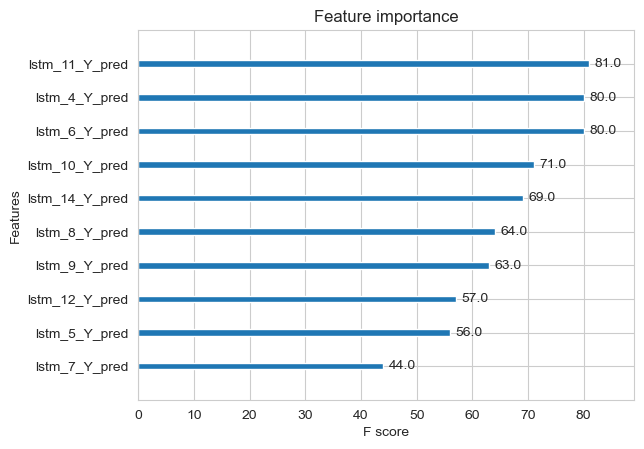

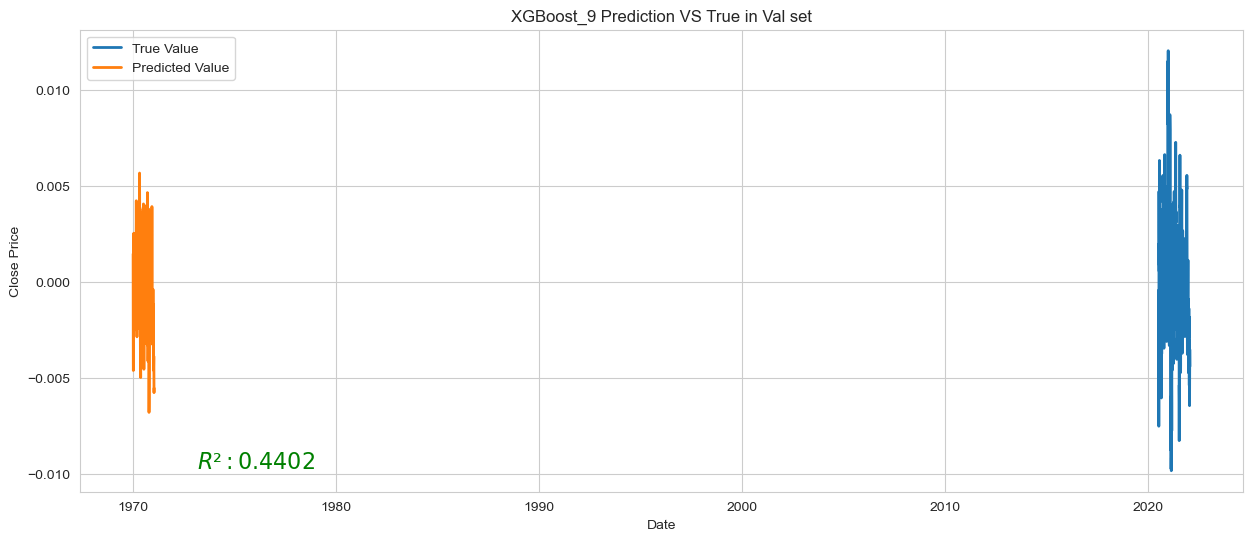

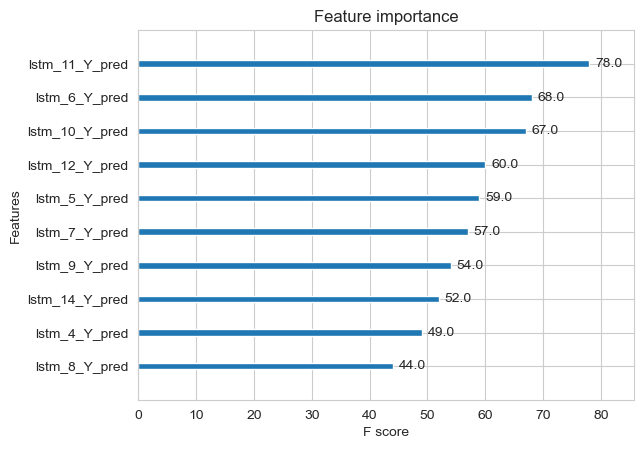

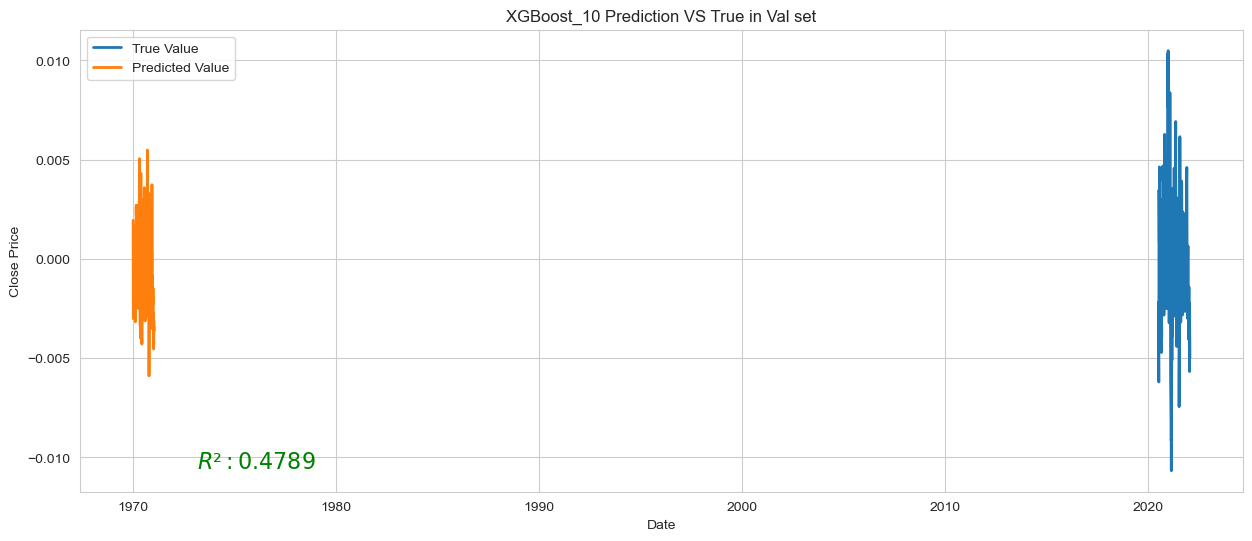

In [1]:
from model.my_xgboost import xgb_T_values, xgb_evaluate, get_xgb_val_r2_dict

xgb_val_r2_dict = get_xgb_val_r2_dict(updated=False)

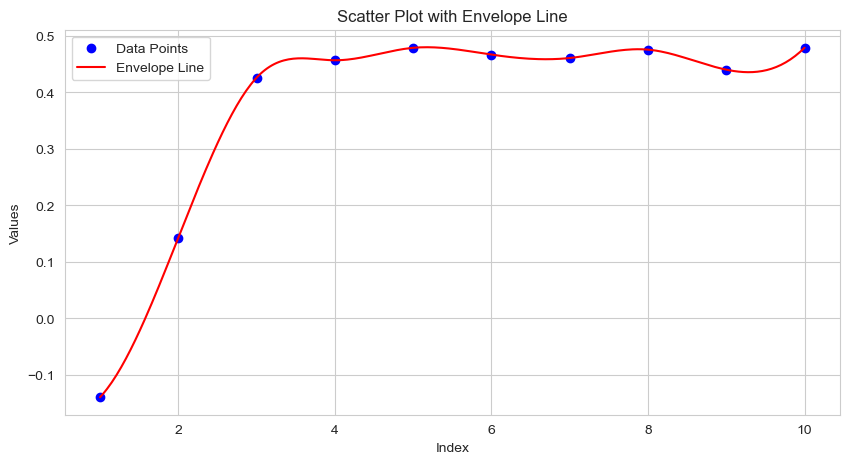

In [4]:
plot_scatter_with_envelope(xgb_val_r2_dict)

## 测试集

Evaluating for different T values in test set:   0%|          | 0/10 [00:00<?, ?it/s]

[0]	eval-rmse:0.01147
[1]	eval-rmse:0.01148
[2]	eval-rmse:0.01138
[3]	eval-rmse:0.01136
[4]	eval-rmse:0.01133
[5]	eval-rmse:0.01142
[6]	eval-rmse:0.01137
[7]	eval-rmse:0.01162
[8]	eval-rmse:0.01164
[9]	eval-rmse:0.01165
[10]	eval-rmse:0.01164
[11]	eval-rmse:0.01174
[12]	eval-rmse:0.01177
[13]	eval-rmse:0.01171
[14]	eval-rmse:0.01174
[15]	eval-rmse:0.01174
[16]	eval-rmse:0.01174
[17]	eval-rmse:0.01182
[18]	eval-rmse:0.01187
[19]	eval-rmse:0.01187
[20]	eval-rmse:0.01187
[21]	eval-rmse:0.01192
[22]	eval-rmse:0.01192
[23]	eval-rmse:0.01196
[24]	eval-rmse:0.01201
[25]	eval-rmse:0.01201
[26]	eval-rmse:0.01208
[27]	eval-rmse:0.01206
[28]	eval-rmse:0.01207
[29]	eval-rmse:0.01207
[30]	eval-rmse:0.01206
[31]	eval-rmse:0.01206
[32]	eval-rmse:0.01208
[33]	eval-rmse:0.01208
[34]	eval-rmse:0.01212
[35]	eval-rmse:0.01212
[36]	eval-rmse:0.01218
[37]	eval-rmse:0.01218
[38]	eval-rmse:0.01218
[39]	eval-rmse:0.01218
[40]	eval-rmse:0.01219
[41]	eval-rmse:0.01220
[42]	eval-rmse:0.01223
[43]	eval-rmse:0.0122

Evaluating for different T values in test set:  10%|█         | 1/10 [00:51<07:46, 51.79s/it]

[0]	eval-rmse:0.00766
[1]	eval-rmse:0.00730
[2]	eval-rmse:0.00709
[3]	eval-rmse:0.00700
[4]	eval-rmse:0.00696
[5]	eval-rmse:0.00697
[6]	eval-rmse:0.00694
[7]	eval-rmse:0.00694
[8]	eval-rmse:0.00697
[9]	eval-rmse:0.00702
[10]	eval-rmse:0.00702
[11]	eval-rmse:0.00696
[12]	eval-rmse:0.00697
[13]	eval-rmse:0.00697
[14]	eval-rmse:0.00699
[15]	eval-rmse:0.00697
[16]	eval-rmse:0.00696
[17]	eval-rmse:0.00696
[18]	eval-rmse:0.00705
[19]	eval-rmse:0.00705
[20]	eval-rmse:0.00702
[21]	eval-rmse:0.00705
[22]	eval-rmse:0.00712
[23]	eval-rmse:0.00718
[24]	eval-rmse:0.00722
[25]	eval-rmse:0.00722
[26]	eval-rmse:0.00729
[27]	eval-rmse:0.00729
[28]	eval-rmse:0.00731
[29]	eval-rmse:0.00731
[30]	eval-rmse:0.00732
[31]	eval-rmse:0.00734
[32]	eval-rmse:0.00737
[33]	eval-rmse:0.00735
[34]	eval-rmse:0.00735
[35]	eval-rmse:0.00736
[36]	eval-rmse:0.00738
[37]	eval-rmse:0.00738
[38]	eval-rmse:0.00741
[39]	eval-rmse:0.00741
[40]	eval-rmse:0.00741
[41]	eval-rmse:0.00741
[42]	eval-rmse:0.00741
[43]	eval-rmse:0.0074

Evaluating for different T values in test set:  20%|██        | 2/10 [01:43<06:52, 51.54s/it]

[0]	eval-rmse:0.00603
[1]	eval-rmse:0.00554
[2]	eval-rmse:0.00529
[3]	eval-rmse:0.00511
[4]	eval-rmse:0.00501
[5]	eval-rmse:0.00497
[6]	eval-rmse:0.00497
[7]	eval-rmse:0.00493
[8]	eval-rmse:0.00494
[9]	eval-rmse:0.00495
[10]	eval-rmse:0.00495
[11]	eval-rmse:0.00496
[12]	eval-rmse:0.00495
[13]	eval-rmse:0.00495
[14]	eval-rmse:0.00496
[15]	eval-rmse:0.00496
[16]	eval-rmse:0.00496
[17]	eval-rmse:0.00496
[18]	eval-rmse:0.00498
[19]	eval-rmse:0.00499
[20]	eval-rmse:0.00500
[21]	eval-rmse:0.00502
[22]	eval-rmse:0.00503
[23]	eval-rmse:0.00505
[24]	eval-rmse:0.00505
[25]	eval-rmse:0.00505
[26]	eval-rmse:0.00504
[27]	eval-rmse:0.00505
[28]	eval-rmse:0.00505
[29]	eval-rmse:0.00505
[30]	eval-rmse:0.00505
[31]	eval-rmse:0.00504
[32]	eval-rmse:0.00505
[33]	eval-rmse:0.00505
[34]	eval-rmse:0.00505
[35]	eval-rmse:0.00506
[36]	eval-rmse:0.00507
[37]	eval-rmse:0.00507
[38]	eval-rmse:0.00507
[39]	eval-rmse:0.00506
[40]	eval-rmse:0.00508
[41]	eval-rmse:0.00510
[42]	eval-rmse:0.00510
[43]	eval-rmse:0.0051

Evaluating for different T values in test set:  30%|███       | 3/10 [02:35<06:03, 51.95s/it]

[0]	eval-rmse:0.00494
[1]	eval-rmse:0.00448
[2]	eval-rmse:0.00423
[3]	eval-rmse:0.00411
[4]	eval-rmse:0.00403
[5]	eval-rmse:0.00400
[6]	eval-rmse:0.00401
[7]	eval-rmse:0.00401
[8]	eval-rmse:0.00400
[9]	eval-rmse:0.00401
[10]	eval-rmse:0.00403
[11]	eval-rmse:0.00406
[12]	eval-rmse:0.00407
[13]	eval-rmse:0.00409
[14]	eval-rmse:0.00410
[15]	eval-rmse:0.00409
[16]	eval-rmse:0.00409
[17]	eval-rmse:0.00410
[18]	eval-rmse:0.00410
[19]	eval-rmse:0.00409
[20]	eval-rmse:0.00410
[21]	eval-rmse:0.00409
[22]	eval-rmse:0.00410
[23]	eval-rmse:0.00410
[24]	eval-rmse:0.00410
[25]	eval-rmse:0.00410
[26]	eval-rmse:0.00410
[27]	eval-rmse:0.00411
[28]	eval-rmse:0.00411
[29]	eval-rmse:0.00414
[30]	eval-rmse:0.00414
[31]	eval-rmse:0.00415
[32]	eval-rmse:0.00416
[33]	eval-rmse:0.00417
[34]	eval-rmse:0.00419
[35]	eval-rmse:0.00418
[36]	eval-rmse:0.00418
[37]	eval-rmse:0.00418
[38]	eval-rmse:0.00418
[39]	eval-rmse:0.00418
[40]	eval-rmse:0.00418
[41]	eval-rmse:0.00419
[42]	eval-rmse:0.00420
[43]	eval-rmse:0.0042

Evaluating for different T values in test set:  40%|████      | 4/10 [03:28<05:13, 52.21s/it]

[0]	eval-rmse:0.00442
[1]	eval-rmse:0.00404
[2]	eval-rmse:0.00383
[3]	eval-rmse:0.00369
[4]	eval-rmse:0.00362
[5]	eval-rmse:0.00359
[6]	eval-rmse:0.00357
[7]	eval-rmse:0.00356
[8]	eval-rmse:0.00356
[9]	eval-rmse:0.00359
[10]	eval-rmse:0.00358
[11]	eval-rmse:0.00358
[12]	eval-rmse:0.00358
[13]	eval-rmse:0.00358
[14]	eval-rmse:0.00359
[15]	eval-rmse:0.00358
[16]	eval-rmse:0.00358
[17]	eval-rmse:0.00359
[18]	eval-rmse:0.00360
[19]	eval-rmse:0.00361
[20]	eval-rmse:0.00361
[21]	eval-rmse:0.00360
[22]	eval-rmse:0.00361
[23]	eval-rmse:0.00361
[24]	eval-rmse:0.00361
[25]	eval-rmse:0.00362
[26]	eval-rmse:0.00363
[27]	eval-rmse:0.00364
[28]	eval-rmse:0.00363
[29]	eval-rmse:0.00363
[30]	eval-rmse:0.00363
[31]	eval-rmse:0.00366
[32]	eval-rmse:0.00366
[33]	eval-rmse:0.00367
[34]	eval-rmse:0.00367
[35]	eval-rmse:0.00367
[36]	eval-rmse:0.00368
[37]	eval-rmse:0.00367
[38]	eval-rmse:0.00369
[39]	eval-rmse:0.00370
[40]	eval-rmse:0.00370
[41]	eval-rmse:0.00371
[42]	eval-rmse:0.00371
[43]	eval-rmse:0.0037

Evaluating for different T values in test set:  50%|█████     | 5/10 [04:20<04:21, 52.23s/it]

[0]	eval-rmse:0.00399
[1]	eval-rmse:0.00363
[2]	eval-rmse:0.00342
[3]	eval-rmse:0.00332
[4]	eval-rmse:0.00326
[5]	eval-rmse:0.00323
[6]	eval-rmse:0.00322
[7]	eval-rmse:0.00320
[8]	eval-rmse:0.00319
[9]	eval-rmse:0.00319
[10]	eval-rmse:0.00319
[11]	eval-rmse:0.00318
[12]	eval-rmse:0.00318
[13]	eval-rmse:0.00319
[14]	eval-rmse:0.00319
[15]	eval-rmse:0.00319
[16]	eval-rmse:0.00319
[17]	eval-rmse:0.00320
[18]	eval-rmse:0.00321
[19]	eval-rmse:0.00322
[20]	eval-rmse:0.00323
[21]	eval-rmse:0.00323
[22]	eval-rmse:0.00323
[23]	eval-rmse:0.00322
[24]	eval-rmse:0.00322
[25]	eval-rmse:0.00322
[26]	eval-rmse:0.00324
[27]	eval-rmse:0.00324
[28]	eval-rmse:0.00325
[29]	eval-rmse:0.00325
[30]	eval-rmse:0.00325
[31]	eval-rmse:0.00325
[32]	eval-rmse:0.00325
[33]	eval-rmse:0.00325
[34]	eval-rmse:0.00325
[35]	eval-rmse:0.00325
[36]	eval-rmse:0.00324
[37]	eval-rmse:0.00325
[38]	eval-rmse:0.00326
[39]	eval-rmse:0.00326
[40]	eval-rmse:0.00326
[41]	eval-rmse:0.00327
[42]	eval-rmse:0.00326
[43]	eval-rmse:0.0032

Evaluating for different T values in test set:  60%|██████    | 6/10 [05:46<04:15, 63.83s/it]

[0]	eval-rmse:0.00357
[1]	eval-rmse:0.00323
[2]	eval-rmse:0.00305
[3]	eval-rmse:0.00297
[4]	eval-rmse:0.00293
[5]	eval-rmse:0.00291
[6]	eval-rmse:0.00290
[7]	eval-rmse:0.00291
[8]	eval-rmse:0.00291
[9]	eval-rmse:0.00291
[10]	eval-rmse:0.00292
[11]	eval-rmse:0.00292
[12]	eval-rmse:0.00292
[13]	eval-rmse:0.00293
[14]	eval-rmse:0.00293
[15]	eval-rmse:0.00295
[16]	eval-rmse:0.00295
[17]	eval-rmse:0.00295
[18]	eval-rmse:0.00295
[19]	eval-rmse:0.00296
[20]	eval-rmse:0.00296
[21]	eval-rmse:0.00296
[22]	eval-rmse:0.00296
[23]	eval-rmse:0.00296
[24]	eval-rmse:0.00298
[25]	eval-rmse:0.00296
[26]	eval-rmse:0.00297
[27]	eval-rmse:0.00297
[28]	eval-rmse:0.00297
[29]	eval-rmse:0.00297
[30]	eval-rmse:0.00297
[31]	eval-rmse:0.00298
[32]	eval-rmse:0.00297
[33]	eval-rmse:0.00297
[34]	eval-rmse:0.00297
[35]	eval-rmse:0.00298
[36]	eval-rmse:0.00296
[37]	eval-rmse:0.00296
[38]	eval-rmse:0.00296
[39]	eval-rmse:0.00297
[40]	eval-rmse:0.00299
[41]	eval-rmse:0.00299
[42]	eval-rmse:0.00299
[43]	eval-rmse:0.0029

Evaluating for different T values in test set:  70%|███████   | 7/10 [07:15<03:35, 71.99s/it]

[0]	eval-rmse:0.00322
[1]	eval-rmse:0.00291
[2]	eval-rmse:0.00275
[3]	eval-rmse:0.00268
[4]	eval-rmse:0.00265
[5]	eval-rmse:0.00264
[6]	eval-rmse:0.00263
[7]	eval-rmse:0.00264
[8]	eval-rmse:0.00264
[9]	eval-rmse:0.00265
[10]	eval-rmse:0.00265
[11]	eval-rmse:0.00266
[12]	eval-rmse:0.00267
[13]	eval-rmse:0.00267
[14]	eval-rmse:0.00267
[15]	eval-rmse:0.00267
[16]	eval-rmse:0.00267
[17]	eval-rmse:0.00267
[18]	eval-rmse:0.00268
[19]	eval-rmse:0.00268
[20]	eval-rmse:0.00268
[21]	eval-rmse:0.00268
[22]	eval-rmse:0.00268
[23]	eval-rmse:0.00268
[24]	eval-rmse:0.00268
[25]	eval-rmse:0.00268
[26]	eval-rmse:0.00268
[27]	eval-rmse:0.00268
[28]	eval-rmse:0.00269
[29]	eval-rmse:0.00269
[30]	eval-rmse:0.00269
[31]	eval-rmse:0.00269
[32]	eval-rmse:0.00269
[33]	eval-rmse:0.00269
[34]	eval-rmse:0.00269
[35]	eval-rmse:0.00269
[36]	eval-rmse:0.00269
[37]	eval-rmse:0.00269
[38]	eval-rmse:0.00269
[39]	eval-rmse:0.00269
[40]	eval-rmse:0.00269
[41]	eval-rmse:0.00269
[42]	eval-rmse:0.00269
[43]	eval-rmse:0.0026

Evaluating for different T values in test set:  80%|████████  | 8/10 [08:07<02:10, 65.49s/it]

[0]	eval-rmse:0.00299
[1]	eval-rmse:0.00279
[2]	eval-rmse:0.00266
[3]	eval-rmse:0.00257
[4]	eval-rmse:0.00253
[5]	eval-rmse:0.00252
[6]	eval-rmse:0.00252
[7]	eval-rmse:0.00252
[8]	eval-rmse:0.00251
[9]	eval-rmse:0.00251
[10]	eval-rmse:0.00251
[11]	eval-rmse:0.00251
[12]	eval-rmse:0.00251
[13]	eval-rmse:0.00252
[14]	eval-rmse:0.00253
[15]	eval-rmse:0.00253
[16]	eval-rmse:0.00253
[17]	eval-rmse:0.00254
[18]	eval-rmse:0.00253
[19]	eval-rmse:0.00254
[20]	eval-rmse:0.00253
[21]	eval-rmse:0.00254
[22]	eval-rmse:0.00254
[23]	eval-rmse:0.00256
[24]	eval-rmse:0.00256
[25]	eval-rmse:0.00256
[26]	eval-rmse:0.00256
[27]	eval-rmse:0.00256
[28]	eval-rmse:0.00256
[29]	eval-rmse:0.00257
[30]	eval-rmse:0.00257
[31]	eval-rmse:0.00257
[32]	eval-rmse:0.00257
[33]	eval-rmse:0.00257
[34]	eval-rmse:0.00257
[35]	eval-rmse:0.00257
[36]	eval-rmse:0.00257
[37]	eval-rmse:0.00257
[38]	eval-rmse:0.00257
[39]	eval-rmse:0.00257
[40]	eval-rmse:0.00257
[41]	eval-rmse:0.00257
[42]	eval-rmse:0.00257
[43]	eval-rmse:0.0025

Evaluating for different T values in test set:  90%|█████████ | 9/10 [08:58<01:01, 61.19s/it]

[0]	eval-rmse:0.00279
[1]	eval-rmse:0.00259
[2]	eval-rmse:0.00242
[3]	eval-rmse:0.00237
[4]	eval-rmse:0.00232
[5]	eval-rmse:0.00229
[6]	eval-rmse:0.00227
[7]	eval-rmse:0.00226
[8]	eval-rmse:0.00226
[9]	eval-rmse:0.00226
[10]	eval-rmse:0.00225
[11]	eval-rmse:0.00225
[12]	eval-rmse:0.00226
[13]	eval-rmse:0.00226
[14]	eval-rmse:0.00228
[15]	eval-rmse:0.00229
[16]	eval-rmse:0.00230
[17]	eval-rmse:0.00230
[18]	eval-rmse:0.00230
[19]	eval-rmse:0.00230
[20]	eval-rmse:0.00230
[21]	eval-rmse:0.00230
[22]	eval-rmse:0.00229
[23]	eval-rmse:0.00229
[24]	eval-rmse:0.00229
[25]	eval-rmse:0.00229
[26]	eval-rmse:0.00229
[27]	eval-rmse:0.00229
[28]	eval-rmse:0.00229
[29]	eval-rmse:0.00229
[30]	eval-rmse:0.00229
[31]	eval-rmse:0.00229
[32]	eval-rmse:0.00229
[33]	eval-rmse:0.00229
[34]	eval-rmse:0.00229
[35]	eval-rmse:0.00229
[36]	eval-rmse:0.00229
[37]	eval-rmse:0.00229
[38]	eval-rmse:0.00229
[39]	eval-rmse:0.00229
[40]	eval-rmse:0.00229
[41]	eval-rmse:0.00229
[42]	eval-rmse:0.00229
[43]	eval-rmse:0.0022

Evaluating for different T values in test set: 100%|██████████| 10/10 [09:50<00:00, 59.06s/it]


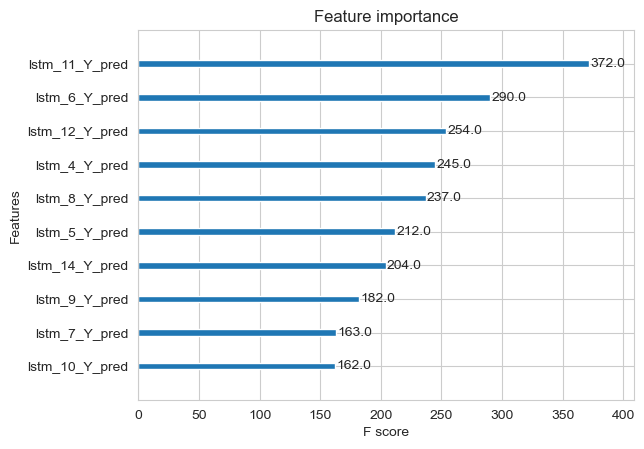

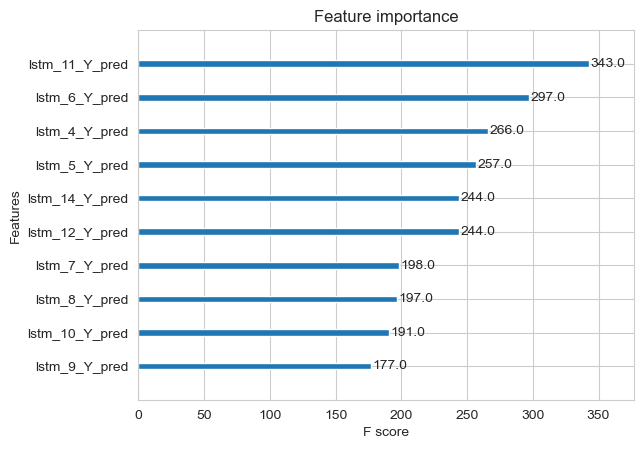

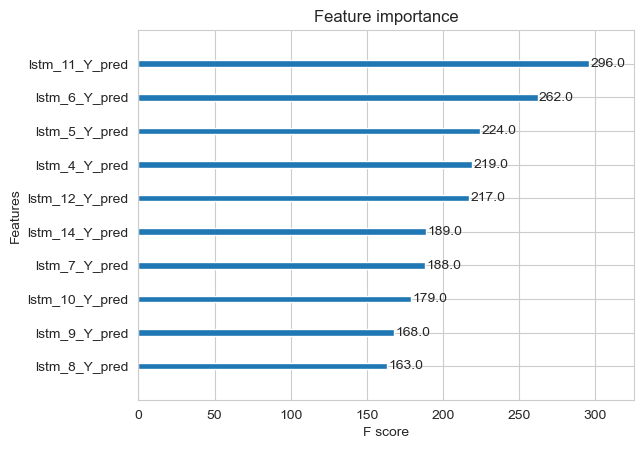

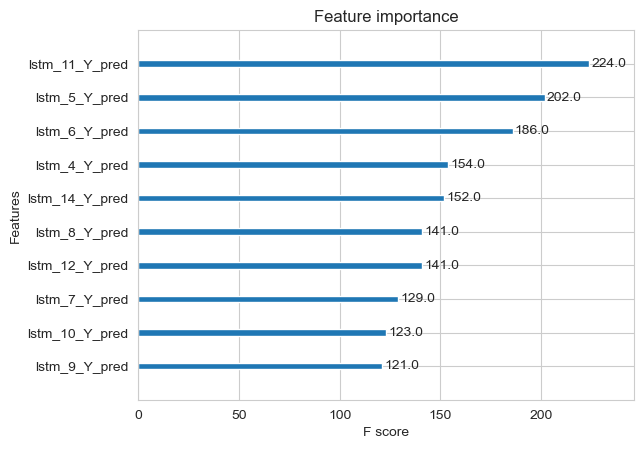

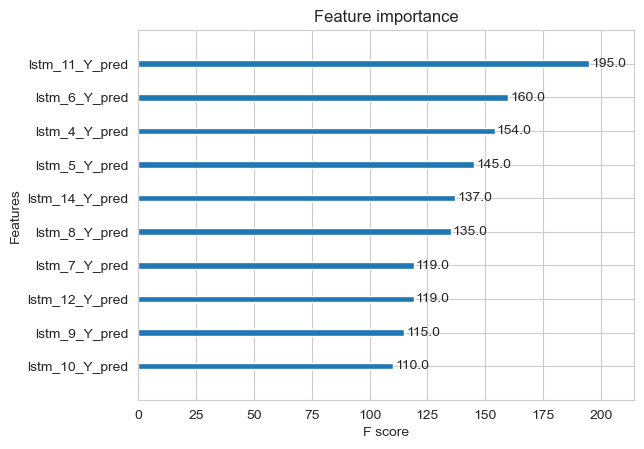

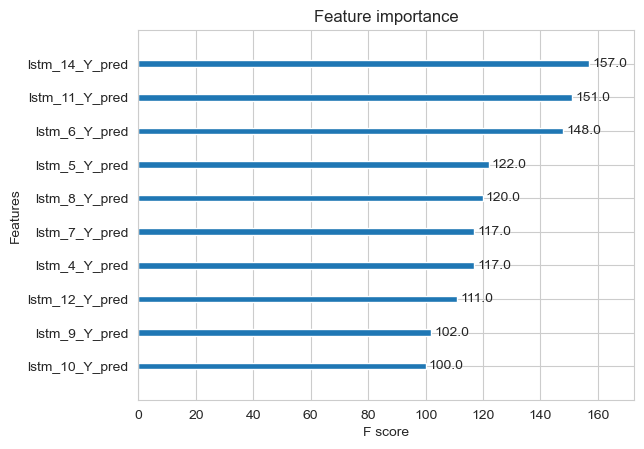

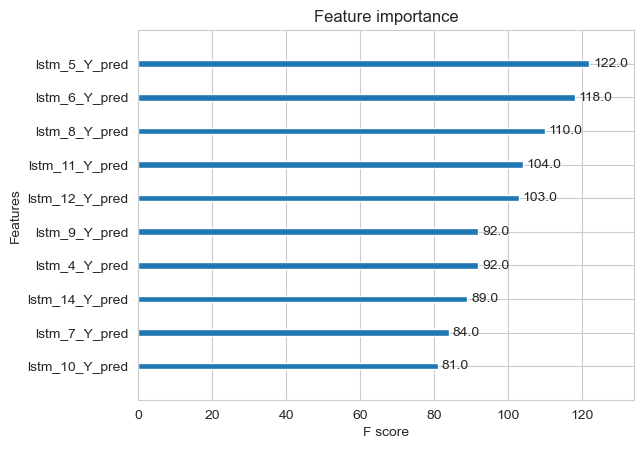

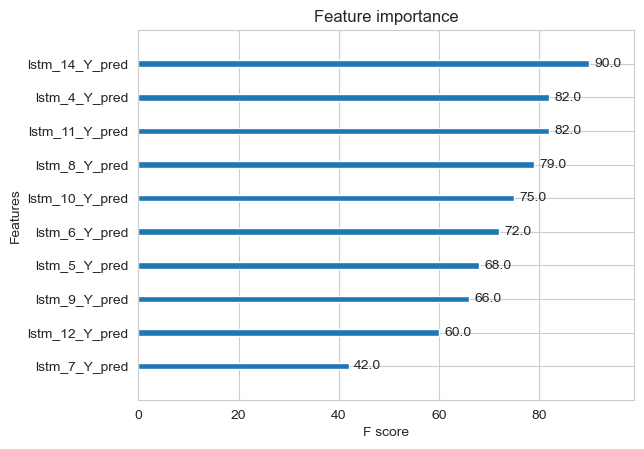

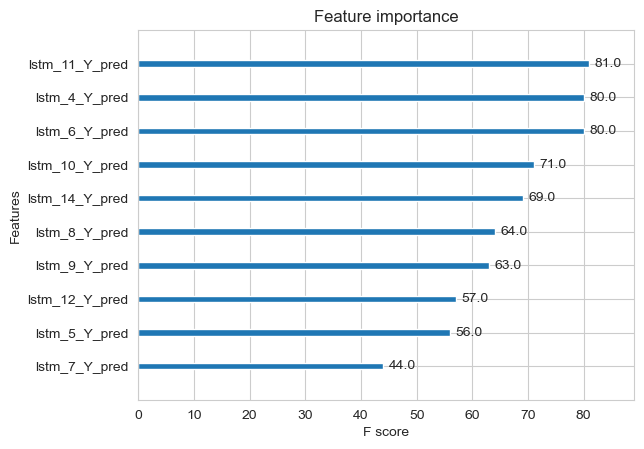

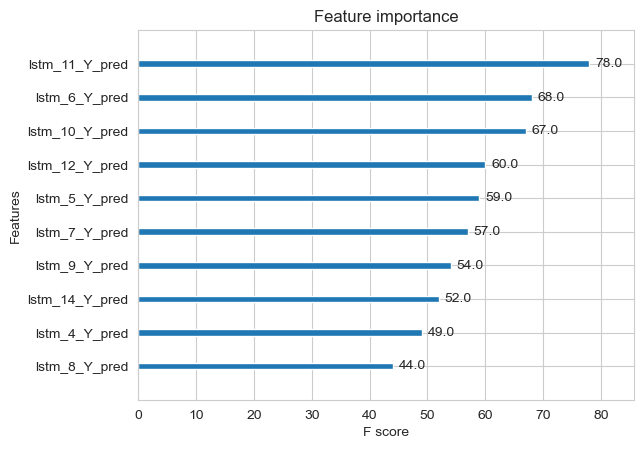

In [1]:

from model.my_xgboost import get_xgb_r2_dict

xgb_test_r2_dict = get_xgb_r2_dict(set='test', updated=False)


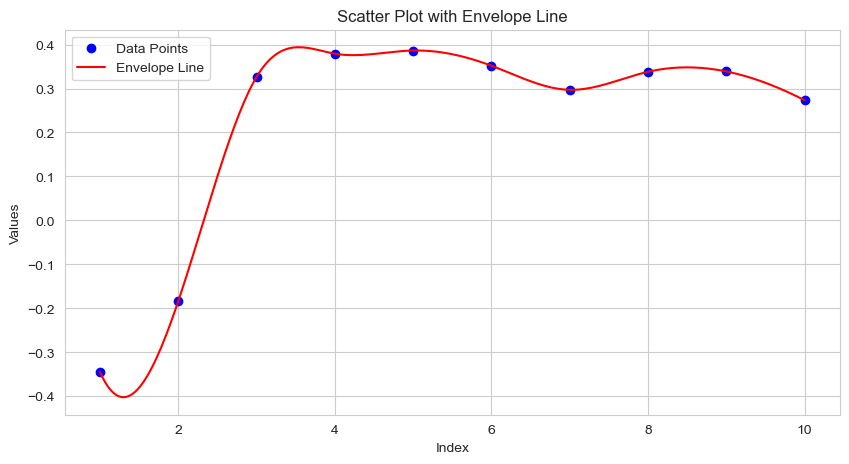

In [4]:
plot_scatter_with_envelope(xgb_test_r2_dict)

## 测试集策略效果

In [18]:
import pandas as pd

# 参数搜索没跑完，从日志提取的已完成数据
data = {
    'target_T': [1, 2, 3, 4, 5, 6, 8, 9, 10],
    'threshold': [0.001] * 9,
    'pnl_ratio': [0.0918517, 0.270293, 0.408637, 0.438587, 0.336341, 0.340063, 0.229553, 0.266641, 0.258948],
    'sharp_ratio': [1.005166, 2.657073, 3.763046, 3.718059, 2.916633, 3.117810, 2.637999, 2.404759, 2.360968],
    'max_drawdown': [0.077748, 0.033744, 0.038719, 0.028029, 0.040312, 0.041160, 0.028321, 0.041161, 0.041161],
    'pnl_ratio_annual': [0.106095, 0.312206, 0.472001, 0.506595, 0.388495, 0.392794, 0.265148, 0.307987, 0.299101]
}

# 创建DataFrame
xgb_backtest_results = pd.DataFrame(data)



In [19]:

benchmark_return = 1.6 * 0.01
xgb_backtest_results['excess_return'] = xgb_backtest_results['pnl_ratio'] - benchmark_return
xgb_backtest_results

,target_T,threshold,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual,excess_return
0,1,0.001,0.091852,1.005166,0.077748,0.106095,0.075852
1,2,0.001,0.270293,2.657073,0.033744,0.312206,0.254293
2,3,0.001,0.408637,3.763046,0.038719,0.472001,0.392637
3,4,0.001,0.438587,3.718059,0.028029,0.506595,0.422587
4,5,0.001,0.336341,2.916633,0.040312,0.388495,0.320341
5,6,0.001,0.340063,3.117810,0.041160,0.392794,0.324063
6,8,0.001,0.229553,2.637999,0.028321,0.265148,0.213553
7,9,0.001,0.266641,2.404759,0.041161,0.307987,0.250641
8,10,0.001,0.258948,2.360968,0.041161,0.299101,0.242948


In [20]:
# 保存
xgb_backtest_results.to_excel('strategy/xgb_backtest_results.xlsx')

# 将LSTM和XGBoost的结果进行对比

## 验证集 R2 折线图

In [1]:
from model.LSTM_base_model import get_lstm_r2_dict
from model.my_xgboost import get_xgb_r2_dict
from results.result_analysis import comparison_scatter_with_envelope

lstm_val_dict = get_lstm_r2_dict('val', updated=False)


Running best_lstms: 100%|██████████| 30/30 [00:35<00:00,  1.19s/it]

Loaded LSTM val r2 dict from ../results/LSTM_val_r2_dict.csv


In [2]:
xgb_val_dict = get_xgb_r2_dict('val',updated=False)

Loaded val set XGBoost R2 dict from ../results/XGBoost_val_r2_dict.csv.


In [20]:
xgb_val_dict

{1: -0.139276236263107,
 2: 0.142918002794373,
 3: 0.4259860041726674,
 4: 0.4568039035687465,
 5: 0.4788229967503836,
 6: 0.4668146807679111,
 7: 0.4607811486031378,
 8: 0.4756239045214823,
 9: 0.4401581330210894,
 10: 0.4789387844469933,
 11: 0.4832780811987496,
 12: 0.4412642518733132,
 13: 0.4397047151501823,
 14: 0.4072102366622254,
 15: 0.381449459533294,
 16: 0.3184675064498375,
 17: 0.2742807423761118,
 18: 0.233927511244547,
 19: 0.1666886184451652,
 20: 0.1378089837992784,
 21: 0.079068566312336,
 22: 0.026199107018458,
 23: 0.1002265137148712,
 24: 0.0209071201288116,
 25: 0.070728748232516,
 26: 0.0088981594230472,
 27: 0.0147712144777838,
 28: -0.0062316690978658,
 29: -0.0483986042934347,
 30: -0.0569838766464796}

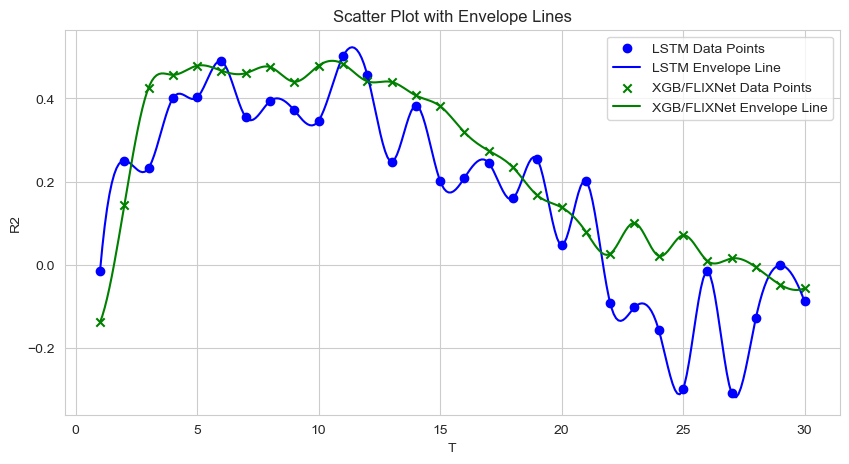

In [14]:

comparison_scatter_with_envelope(lstm_val_dict, xgb_val_dict)

In [6]:
# lstm_val_dict最大值对应的key
lstm_best_T = max(lstm_val_dict, key=lstm_val_dict.get)

# xgb_val_dict最大值对应的key
xgb_best_T = max(xgb_val_dict, key=xgb_val_dict.get)

lstm_best_T, xgb_best_T

(11, 11)

## 测试集 R2 折线图

In [21]:
from results.result_analysis import comparison_scatter_with_envelope

lstm_test_dict = get_lstm_r2_dict('test', updated=False)
xgb_test_dict = get_xgb_r2_dict('test', updated=False)

Loaded LSTM test r2 dict from ../results/LSTM_test_r2_dict.csv
Loaded test set XGBoost R2 dict from ../results/XGBoost_test_r2_dict.csv.


In [22]:
print(f'LSTM R2: {lstm_test_dict}')
print(f'XGBoost R2: {xgb_test_dict}')

LSTM R2: {1: -0.0787219880593059, 2: 0.1712220774448273, 3: 0.1972810584673727, 4: 0.3219353290203186, 5: 0.4361130390642703, 6: 0.2651338254116585, 7: 0.2251148928669144, 8: -0.0090605740644638, 9: 0.1067476021135688, 10: 0.0820805246210658, 11: 0.2107111159912142, 12: 0.3786261882813343, 13: 0.1005142658896584, 14: -0.1604554481267508, 15: 0.0479900783246591, 16: -0.0012593168858976, 17: -0.2003896521717068, 18: -0.1314818232098196, 19: -0.0620328142496151, 20: -0.2559837745654019, 21: -0.9027910881202, 22: -0.4000856130657424, 23: -0.954436167544912, 24: -0.3470078780417016, 25: -0.6385795924388817, 26: -0.2232373585380054, 27: -2.535245459194844, 28: -1.7186014677245574, 29: -2.1582271911698423, 30: -2.2291739272420874}
XGBoost R2: {1: -0.3448270768553558, 2: -0.1835863152694403, 3: 0.3263518419599165, 4: 0.3792333200363355, 5: 0.3864999500144035, 6: 0.351863790202726, 7: 0.2970749964590797, 8: 0.3380824237659259, 9: 0.3388639610370043, 10: 0.2734701719966101, 11: 0.425108648563642

In [28]:
max_T = 15
lstm_test_dict = {T: lstm_test_dict[T] for T in range(1, max_T + 1)}
xgb_test_dict = {T: xgb_test_dict[T] for T in range(1, max_T + 1)}
lstm_test_dict

{1: -0.0787219880593059,
 2: 0.1712220774448273,
 3: 0.1972810584673727,
 4: 0.3219353290203186,
 5: 0.4361130390642703,
 6: 0.2651338254116585,
 7: 0.2251148928669144,
 8: -0.0090605740644638,
 9: 0.1067476021135688,
 10: 0.0820805246210658,
 11: 0.2107111159912142,
 12: 0.3786261882813343,
 13: 0.1005142658896584,
 14: -0.1604554481267508,
 15: 0.0479900783246591}

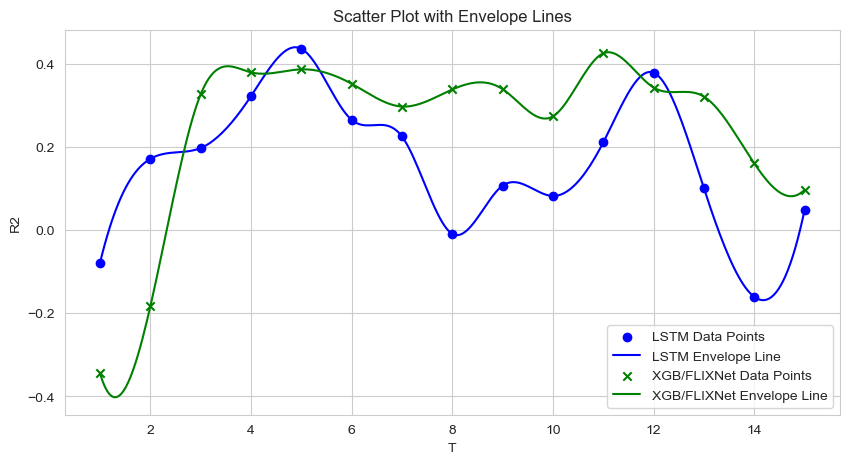

In [29]:

comparison_scatter_with_envelope(lstm_test_dict, xgb_test_dict)

In [25]:
lstm_test_dict[lstm_best_T], xgb_test_dict[xgb_best_T]

(0.2107111159912142, 0.4251086485636426)

## 验证集策略效果对比

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

benchmark_return = 0.27 * 0.01

# 读取LSTM的测试集策略效果
lstm_strategy_path = "strategy/lstm_val_backtest.xlsx"
lstm_strategy_result = pd.read_excel(lstm_strategy_path)
lstm_strategy_result['excess_return'] = lstm_strategy_result['pnl_ratio'] - benchmark_return

# 读取XGBoost的测试集策略效果
xgb_strategy_path = "strategy/xgb_val_backtest.xlsx"
xgb_strategy_result = pd.read_excel(xgb_strategy_path)
xgb_strategy_result['excess_return'] = xgb_strategy_result['pnl_ratio'] - benchmark_return

In [59]:
# lstm_strategy_result按照T升序
lstm_strategy_result.sort_values(by='T',inplace=True)

# xgb_strategy_result按照target_T升序
xgb_strategy_result.sort_values(by='target_T',inplace=True)

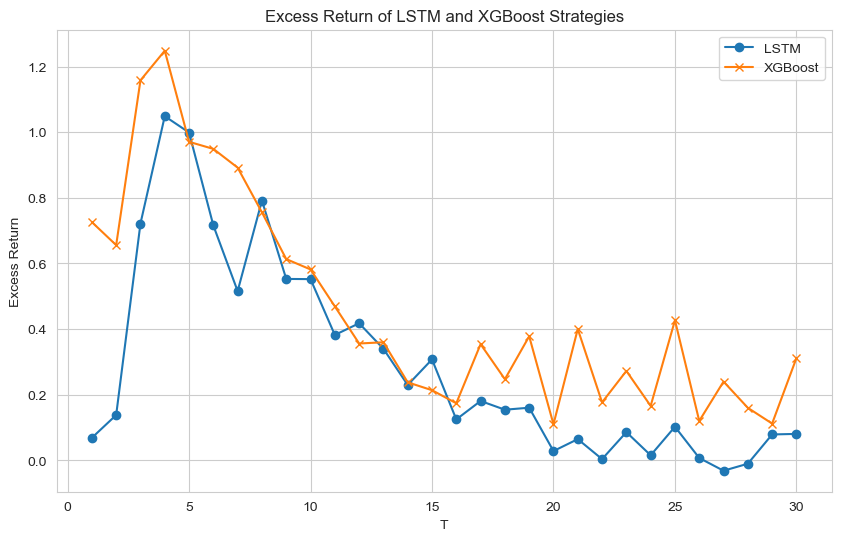

In [60]:

# 将两个excess_return画到同一幅图中
plt.figure(figsize=(10, 6))
plt.plot(lstm_strategy_result['T'], lstm_strategy_result['excess_return'], 'o-', label='LSTM')
plt.plot(xgb_strategy_result['target_T'], xgb_strategy_result['excess_return'], 'x-', label='XGBoost')
plt.xlabel('T')
plt.ylabel('Excess Return')
plt.title('Excess Return of LSTM and XGBoost Strategies')
plt.legend()
plt.grid(True)
plt.show()


## 测试集策略效果对比

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

benchmark_return = 1.6 * 0.01

# 读取LSTM的测试集策略效果
lstm_strategy_path = "strategy/lstm_backtest_results.xlsx"
lstm_strategy_result = pd.read_excel(lstm_strategy_path)
lstm_strategy_result['excess_return'] = lstm_strategy_result['pnl_ratio'] - benchmark_return

# 读取XGBoost的测试集策略效果
xgb_strategy_path = "combined_model/xgb_test_strategy_6.xlsx"
xgb_strategy_result = pd.read_excel(xgb_strategy_path)
xgb_strategy_result['excess_return'] = xgb_strategy_result['pnl_ratio'] - benchmark_return

In [36]:
import ast

# Convert the strings in the 'params' column back into dictionaries
xgb_strategy_result['params'] = xgb_strategy_result['params'].apply(ast.literal_eval)

# Now you can extract the 'target_T' values
xgb_strategy_result['target_T'] = xgb_strategy_result['params'].apply(lambda x: x['target_T'])
xgb_strategy_result

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual,excess_return,target_T
0,"{'target_T': 1, 'threshold': 0.001}",0.35140744,3.18494416,0.03826859,0.40589783,0.33540744,1
1,"{'target_T': 2, 'threshold': 0.001}",0.35281129,3.18063327,0.03984483,0.40751937,0.33681129,2
2,"{'target_T': 3, 'threshold': 0.001}",0.43973009,4.08719259,0.02494756,0.50791608,0.42373009,3
3,"{'target_T': 4, 'threshold': 0.001}",0.43747120,3.87822132,0.03528503,0.50530692,0.42147120,4
4,"{'target_T': 5, 'threshold': 0.001}",0.37660866,3.30207565,0.03389157,0.43500684,0.36060866,5
5,"{'target_T': 6, 'threshold': 0.001}",0.26782434,2.44195234,0.04116059,0.30935406,0.25182434,6
6,"{'target_T': 7, 'threshold': 0.001}",0.27992908,2.55708233,0.04116085,0.32333581,0.26392908,7
7,"{'target_T': 8, 'threshold': 0.001}",0.27889001,2.84597683,0.02851546,0.32213561,0.26289001,8
8,"{'target_T': 9, 'threshold': 0.001}",0.24991121,2.30832284,0.04116059,0.28866326,0.23391121,9
9,"{'target_T': 10, 'threshold': 0.001}",0.26251945,2.38162635,0.04116059,0.30322658,0.24651945,10


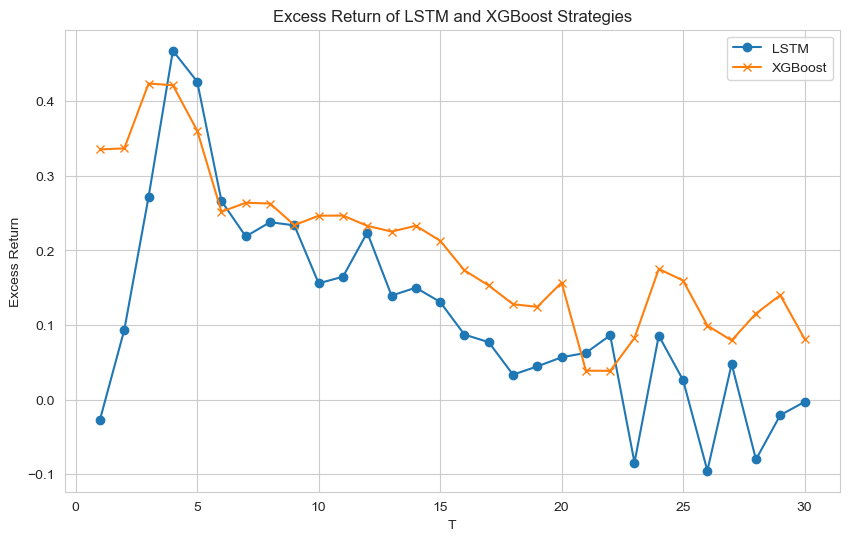

In [32]:

# 将两个excess_return画到同一幅图中
plt.figure(figsize=(10, 6))
plt.plot(lstm_strategy_result['T'], lstm_strategy_result['excess_return'], 'o-', label='LSTM')
plt.plot(xgb_strategy_result['target_T'], xgb_strategy_result['excess_return'], 'x-', label='XGBoost')
plt.xlabel('T')
plt.ylabel('Excess Return')
plt.title('Excess Return of LSTM and XGBoost Strategies')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# 查看target_T==xgb_best_T的策略效果
xgb_strategy_result[xgb_strategy_result['target_T'] == xgb_best_T]

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual,excess_return,target_T
10,"{'target_T': 11, 'threshold': 0.001}",0.26273351,2.46570126,0.03418552,0.30347384,0.24673351,11


In [38]:
# 查看T==lstm_best_T的策略效果
lstm_strategy_result[lstm_strategy_result['T'] == lstm_best_T]

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual,excess_return,T
10,"{'T': 11, 'threshold': 0.001}",0.18073516,1.68096283,0.04257882,0.20876055,0.16473516,11
